In [92]:
import csv

from pprint import pprint
import os

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from collections import Counter

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from PIL import Image
from os import path

import emoji
import emojis

In [93]:
#reading in data
usa_yt_path = "resources/US_youtube_trending_data.csv"

usa_yt= pd.read_csv(usa_yt_path)

us_yt_df = pd.DataFrame(usa_yt)
us_yt_df

ca_yt_path="resources/CA_Merged_data.csv"
in_yt_path="resources/IN_Merged_data.csv"
usa_yt_path="resources/US_Merged_data.csv"
gb_yt_path="resources/GB_Merged_data.csv"

ca_yt = pd.read_csv(ca_yt_path,low_memory=False)
in_yt =pd.read_csv(in_yt_path,low_memory=False)
usa_yt =pd.read_csv(usa_yt_path,low_memory=False)
gb_yt = pd.read_csv(gb_yt_path,low_memory=False)

ca_df=pd.DataFrame(ca_yt)
in_df=pd.DataFrame(in_yt)
usa_yt_df=pd.DataFrame(usa_yt)
gb_df=pd.DataFrame(gb_yt)






In [94]:
#drop nas
ca_df=ca_df.dropna()
in_df=in_df.dropna()
us_yt_df=us_yt_df.dropna()
gb_df=gb_df.dropna()
in_df

video_id                                              title  \
0      Iot0eF6EoNA  Sadak 2 | Official Trailer | Sanjay | Pooja | ...   
1      4dRHHupQM-s            Naagin 5 | नागिन 5 | Episode 01 | Recap   
2           #NAME?                                Ludo | BakLol Video   
3      oaSgSobLwtQ  FLESH Official Trailer | Eros Now Originals | ...   
4      1Y2u-05Yhxw  WALL OF DARES WITH BROTHER & SISTER PART 2 | R...   
...            ...                                                ...   
82810  JdCFUDLCVkM  ലോക്ഡൗൺ ഇളവിൽ പണിസ്ഥലത്ത് എത്തിയ പണിക്കാർകണ്ടത...   
82815  3L_qPqcLL4c  കോയ്‌ ഫിഷ്‌ Hunt😎… Muscovy ഇത്രയധികം കുട്ടികൾ ...   
82816  3L_qPqcLL4c  കോയ്‌ ഫിഷ്‌ Hunt😎… Muscovy ഇത്രയധികം കുട്ടികൾ ...   
82817  3L_qPqcLL4c  കോയ്‌ ഫിഷ്‌ Hunt😎… Muscovy ഇത്രയധികം കുട്ടികൾ ...   
82818  3L_qPqcLL4c  കോയ്‌ ഫിഷ്‌ Hunt😎… Muscovy ഇത്രയധികം കുട്ടികൾ ...   

                publishedAt                 channelId      channelTitle  \
0      2020-08-12T04:31:41Z  UCGqvJPRcv7aVFun-eTsatcA      FoxStarHindi   
1      2020-08-10T04:30:48Z  UC55IWqFLDH1Xp7iu1_xknRA         Colors TV   
2      2020-08-11T10:32:30Z  UCQfE97UMDGgKCFb7iGM8Btg      BakLol Video   
3      2020-08-11T07:22:53Z  UCX52tYZiEh_mHoFja3Veciw          Eros Now   
4      2020-08-11T08:33:04Z  UCaqULAbiq-6ZRlKmx0Uv_Cw     Rimorav Vlogs   
...                     ...                       ...               ...   
82810  2021-06-04T03:30:07Z  UCSVALYUGVruJ4I2RjhiudSQ           Kaumudy   
82815  2021-09-21T06:30:03Z  UCDLu75pehPK2PsoC6aC4rZg  Petstationkannur   
82816  2021-09-21T06:30:03Z  UCDLu75pehPK2PsoC6aC4rZg  Petstationkannur   
82817  2021-09-21T06:30:03Z  UCDLu75pehPK2PsoC6aC4rZg  Petstationkannur   
82818  2021-09-21T06:30:03Z  UCDLu75pehPK2PsoC6aC4rZg  Petstationkannur   

       categoryId         trending_date  \
0              24  2020-08-12T00:00:00Z   
1              24  2020-08-12T00:00:00Z   
2              24  2020-08-12T00:00:00Z   
3              24  2020-08-12T00:00:00Z   
4              24  2020-08-12T00:00:00Z   
...           ...                   ...   
82810          15  2021-06-10T00:00:00Z   
82815          15  2021-09-21T00:00:00Z   
82816          15  2021-09-22T00:00:00Z   
82817          15  2021-09-23T00:00:00Z   
82818          15  2021-09-24T00:00:00Z   

                                                    tags  view_count  \
0      sadak|sadak 2|mahesh bhatt|vishesh films|pooja...   9885899.0   
1      Naagin 5|Naagin|Season 5|Hina Khan|Dheeraj Dho...   3816680.0   
2      funny video|ludo video|funny ludo|ludo players...    837562.0   
3      Flesh|flesh web series|flesh new series|flesh ...  13210819.0   
4      rimorav|rimorav vlogs|WALL OF DARES WITH BROTH...   1549015.0   
...                                                  ...         ...   
82810  snakemasterlatest|vavasureshvideos|snakemaster...   1198969.0   
82815                                             [None]    152002.0   
82816                                             [None]    328918.0   
82817                                             [None]    394226.0   
82818                                             [None]    443024.0   

          likes   dislikes  comment_count  \
0      224925.0  3979409.0       350210.0   
1       30086.0     6786.0         3733.0   
2       21510.0     2290.0         1704.0   
3       18787.0    21210.0            0.0   
4      210151.0     2682.0       140543.0   
...         ...        ...            ...   
82810   31375.0     1070.0          646.0   
82815   15061.0      225.0         1108.0   
82816   23640.0      392.0         1542.0   
82817   25788.0      448.0         1620.0   
82818   27320.0      497.0         1624.0   

                                       thumbnail_link comments_disabled  \
0      https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg             False   
1      https://i.ytimg.com/vi/4dRHHupQM-s/default.jpg             False   
2      https://i.ytimg.com/vi/-h9fY8j22yg/default.jpg             False   
3      ht

In [97]:
gb_df

video_id                                              title  \
0      J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
1      kgUV1MaD_M8                     Nines - Clout (Official Video)   
2      ZNfeMbO_AHo  Popek ft. Dr Alban - It's My Life  (prod. Clay...   
3      p7HGUZWq_8s                          Doing Doja Cat’s Makeup!!   
4      vBpKlwm64SI  MANCHESTER UNITED vs FC COPENHAGEN With MARK G...   
...            ...                                                ...   
88390  4TrCcG2yUSA  BTS Performs Permission to Dance in Seoul to o...   
88391  pXrXnCG64Og  Coldplay – Fix You (Live with Billie Eilish an...   
88392  YnwoRxbU9Jc  Coldplay and BTS Share New Song My Universe | ...   
88393  pXrXnCG64Og  Coldplay – Fix You (Live with Billie Eilish an...   
88394  YnwoRxbU9Jc  Coldplay and BTS Share New Song My Universe | ...   

                publishedAt                 channelId      channelTitle  \
0      2020-08-11T16:34:06Z  UCYzPXprvl5Y-Sf0g4vX-m6g     jacksepticeye   
1      2020-08-10T18:30:28Z  UCvDkzrj8ZPlBqRd6fIxdhTw             Nines   
2      2020-08-12T10:00:09Z  UC8Mh9UmrIaQPEcybdWvQsOg     KrólAlbaniiTV   
3      2020-08-11T19:00:09Z  UCucot-Zp428OwkyRm2I7v2Q     James Charles   
4      2020-08-10T22:08:11Z  UCMmVPVb0BwSIOWVeDwlPocQ  The United Stand   
...                     ...                       ...               ...   
88390  2021-09-25T18:33:43Z  UCg3_C7BwcV0kBlJbBFHTPJQ    Global Citizen   
88391  2021-09-26T07:59:28Z  UCg3_C7BwcV0kBlJbBFHTPJQ    Global Citizen   
88392  2021-09-26T06:47:08Z  UCg3_C7BwcV0kBlJbBFHTPJQ    Global Citizen   
88393  2021-09-26T07:59:28Z  UCg3_C7BwcV0kBlJbBFHTPJQ    Global Citizen   
88394  2021-09-26T06:47:08Z  UCg3_C7BwcV0kBlJbBFHTPJQ    Global Citizen   

       categoryId         trending_date  \
0              24  2020-08-12T00:00:00Z   
1              24  2020-08-12T00:00:00Z   
2              24  2020-08-12T00:00:00Z   
3              24  2020-08-12T00:00:00Z   
4              24  2020-08-12T00:00:00Z   
...           ...                   ...   
88390          29  2021-09-29T00:00:00Z   
88391          29  2021-09-30T00:00:00Z   
88392          29  2021-09-30T00:00:00Z   
88393          29  2021-10-01T00:00:00Z   
88394          29  2021-10-01T00:00:00Z   

                                                    tags  view_count  \
0      jacksepticeye|funny|funny meme|memes|jacksepti...   2038853.0   
1      Nines|Trapper of the year|Crop Circle|Nines Tr...    613785.0   
2                                                 [None]    277506.0   
3      james|james charles|makeup artist|covergirl|co...   3662673.0   
4      The United Stand|United Stand|United|Mark Gold...    570490.0   
...                                                  ...         ...   
88390   Global Citizen|Global Citizenship|Music Festival   3206095.0   
88391   Global Citizen|Global Citizenship|Music Festival   1111847.0   
88392   Global Citizen|Global Citizenship|Music Festival   3767363.0   
88393   Global Citizen|Global Citizenship|Music Festival   1251353.0   
88394   Global Citizen|Global Citizenship|Music Festival   4036456.0   

          likes  dislikes  comment_count  \
0      353790.0    2628.0        40228.0   
1       37567.0     669.0         2101.0   
2       27420.0     617.0         1268.0   
3      394697.0    5760.0        27349.0   
4        8737.0     460.0          269.0   
...         ...       ...            ...   
88390  329374.0    1570.0            0.0   
88391   67487.0     406.0            0.0   
88392  425472.0    1501.0            0.0   
88393   74092.0     452.0            0.0   
88394  443790.0    1605.0            0.0   

                                       thumbnail_link comments_disabled  \
0      https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg             False   
1      https://i.ytimg.com/vi/kgUV1MaD_M8/default.jpg             False   
2      https://i.ytimg.com/vi/ZNfeMbO_AHo/default.jpg             False   
3      https://i.ytim

In [98]:
us_yt_df

video_id                                              title  \
0      3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1      M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2      J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3      kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4      VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   
...            ...                                                ...   
88386  dDxe0vdWmU0  I tested them in Minecraft early and so should...   
88387  s9tyFdMXN-E               I LIVE IN THE WOODS NOW (I'M SCARED)   
88388  8-Cz_uG2OUM                I Bought Every Seat On An Airplane!   
88389  3lfBDZaMqM4                 Haunted Theories with Shane Dawson   
88390  bYrOJyQNKIM                               Customizing Pumpkins   

                publishedAt                 channelId      channelTitle  \
0      2020-08-11T19:20:14Z  UCvtRTOMP2TqYqu51xNrqAzg          Brawadis   
1      2020-08-11T17:00:10Z  UC0ZV6M2THA81QT9hrVWJG3A      Apex Legends   
2      2020-08-11T16:34:06Z  UCYzPXprvl5Y-Sf0g4vX-m6g     jacksepticeye   
3      2020-08-11T16:38:55Z  UCbg_UMjlHJg_19SZckaKajg               XXL   
4      2020-08-11T15:10:05Z  UCDVPcEbVLQgLZX0Rt6jo34A          Mr. Kate   
...                     ...                       ...               ...   
88386  2021-10-15T16:00:31Z  UC14fB9eWBu579yRWLUhbFdQ         SystemZee   
88387  2021-10-15T20:37:41Z  UCbYzlEUtmKsvkzyVm6rPPlQ     Garrett Watts   
88388  2021-10-15T14:25:08Z  UCyps-v4WNjWDnYRKmZ4BUGw           Airrack   
88389  2021-10-14T21:01:34Z  UCV9_KinVpV-snHe3C3n1hvA             shane   
88390  2021-10-15T20:00:08Z  UCYAB7hh1ohA8-iX54EpMdeA  Moriah Elizabeth   

       categoryId         trending_date  \
0              22  2020-08-12T00:00:00Z   
1              20  2020-08-12T00:00:00Z   
2              24  2020-08-12T00:00:00Z   
3              10  2020-08-12T00:00:00Z   
4              26  2020-08-12T00:00:00Z   
...           ...                   ...   
88386          20  2021-10-21T00:00:00Z   
88387          23  2021-10-21T00:00:00Z   
88388          24  2021-10-21T00:00:00Z   
88389          23  2021-10-21T00:00:00Z   
88390          24  2021-10-21T00:00:00Z   

                                                    tags  view_count   likes  \
0      brawadis|prank|basketball|skits|ghost|funny vi...     1514614  156908   
1      Apex Legends|Apex Legends characters|new Apex ...     2381688  146739   
2      jacksepticeye|funny|funny meme|memes|jacksepti...     2038853  353787   
3      xxl freshman|xxl freshmen|2020 xxl freshman|20...      496771   23251   
4      The LaBrant Family|DIY|Interior Design|Makeove...     1123889   45802   
...                                                  ...         ...     ...   
88386  minecraft|mob vote 2021|minecraft live|glare|a...     2869193  138602   
88387  spooky boys|haunted|adventure|ghost story|afra...      623990   63594   
88388                the 21000 first class airplane seat     2333717  110205   
88389  shane|dawson|journalism|investigative journali...     2544031  158723   
88390                                             [None]     2398691  117288   

       dislikes  comment_count  \
0          5855          35313   
1          2794          16549   
2          2628          40221   
3          1856           7647   
4           964           2196   
...         ...            ...   
88386      2383          13412   
88387       561          10533   
88388      2439           5846   
88389     12353          18607   
88390       963          12583   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg              False   
1      https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg              False   
2      https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg              False   
3      https://i.ytimg.com/vi/kXLn3HkpjaA

In [8]:
# df=us_yt_df

# df.value_counts()


video_id     title                                                                                               publishedAt           channelId                 channelTitle           categoryId  trending_date         tags                                                                                                                                                                                                                                                                                                                                                                                                                                                                      view_count  likes   dislikes  comment_count  thumbnail_link                                  comments_disabled  ratings_disabled  description                                                                                                                                                                                       

tags
0      brawadis|prank|basketball|skits|ghost|funny vi...
1      Apex Legends|Apex Legends characters|new Apex ...
2      jacksepticeye|funny|funny meme|memes|jacksepti...
3      xxl freshman|xxl freshmen|2020 xxl freshman|20...
4      The LaBrant Family|DIY|Interior Design|Makeove...
...                                                  ...
88386  minecraft|mob vote 2021|minecraft live|glare|a...
88387  spooky boys|haunted|adventure|ghost story|afra...
88388                the 21000 first class airplane seat
88389  shane|dawson|journalism|investigative journali...
88390                                             [None]

[88391 rows x 1 columns]

SyntaxError: invalid syntax (<ipython-input-8-19ed391564bc>, line 4)

In [99]:
#df1 = us_yt_df
#sorting and cleaning data of duplicate video entries
ttv_us=us_yt_df.sort_values(["video_id","view_count"],ascending=False)
ttv_us=ttv_us.drop_duplicates(subset=["video_id"],keep='first',ignore_index=True)

ttv_gb=gb_df.sort_values(["video_id","view_count"],ascending=False)
ttv_gb=ttv_gb.drop_duplicates(subset=["video_id"],keep='first',ignore_index=True)

ttv_in=in_df.sort_values(["video_id","view_count"],ascending=False)
ttv_in=ttv_in.drop_duplicates(subset=["video_id"],keep='first',ignore_index=True)

ttv_ca=ca_df.sort_values(["video_id","view_count"],ascending=False)
ttv_ca=ttv_ca.drop_duplicates(subset=["video_id"],keep='first',ignore_index=True)




ttv_us=ttv_us.sort_values(["view_count","likes"],ascending=False)
ttv_gb=ttv_gb.sort_values(["view_count","likes"],ascending=False)
ttv_in=ttv_in.sort_values(["view_count","likes"],ascending=False)
ttv_ca=ttv_ca.sort_values(["view_count","likes"],ascending=False)

ttv_us_head= ttv_us.head()
ttv_gb_head=ttv_gb.head()
ttv_in_head=ttv_in.head()
ttv_ca_head=ttv_ca.head()


print(ttv_us_head)
print(ttv_gb_head)
print(ttv_in_head)
print(ttv_ca_head)


          video_id                                            title  \
7237   WMweEpGlu_U                 BTS (방탄소년단) 'Butter' Official MV   
4580   gdZLi9oWNZg               BTS (방탄소년단) 'Dynamite' Official MV   
4345   hdmx71UjBXs              Turn into orbeez - Tutorial #Shorts   
1090   vRXZj0DzXIA  BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V   
11775  CuklIb9d3fI    BTS (방탄소년단) 'Permission to Dance' Official MV   

                publishedAt                 channelId    channelTitle  \
7237   2021-05-21T03:46:13Z  UC3IZKseVpdzPSBaWxBxundA     HYBE LABELS   
4580   2020-08-21T03:58:10Z  UC3IZKseVpdzPSBaWxBxundA  Big Hit Labels   
4345   2021-07-03T04:04:57Z  UCt8z2S30Wl-GQEluFVM8NUw          FFUNTV   
1090   2020-08-28T04:00:11Z  UCOmHUn--16B90oW2L6FRR3A       BLACKPINK   
11775  2021-07-09T03:59:12Z  UC3IZKseVpdzPSBaWxBxundA     HYBE LABELS   

       categoryId         trending_date  \
7237           10  2021-05-30T00:00:00Z   
4580           10  2020-08-28T00:00:00Z   
4345 

In [164]:
#lets see what we are working with and set top 20 vars
ttv_us_20=ttv_us.head(150)
ttv_gb_20=ttv_gb.head(20)
ttv_in_20=ttv_in.head(20)
ttv_ca_20=ttv_ca.head(20)
#ttv_us_20=pd.DataFrame(ttv_us_20)
ttv_us_20


video_id                                              title  \
7237   WMweEpGlu_U                   BTS (방탄소년단) 'Butter' Official MV   
4580   gdZLi9oWNZg                 BTS (방탄소년단) 'Dynamite' Official MV   
4345   hdmx71UjBXs                Turn into orbeez - Tutorial #Shorts   
1090   vRXZj0DzXIA    BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V   
11775  CuklIb9d3fI      BTS (방탄소년단) 'Permission to Dance' Official MV   
...            ...                                                ...   
13590  5Fg9oZk-5uA                    I Bought Everything In 5 Stores   
9264   NZlClr_ivb4                       Make THIS Shot, Win $300,000   
4194   iHCjPjVGqbM  OMG What's happening? #shorts​ Cool videos fro...   
11130  FbM1yi4mMMc                          I Bought A Private Island   
4976   f0c7pSCoZqE  I Put 1,000,000 Christmas Lights On A House (W...   

                publishedAt                 channelId    channelTitle  \
7237   2021-05-21T03:46:13Z  UC3IZKseVpdzPSBaWxBxundA     HYBE LABELS   
4580   2020-08-21T03:58:10Z  UC3IZKseVpdzPSBaWxBxundA  Big Hit Labels   
4345   2021-07-03T04:04:57Z  UCt8z2S30Wl-GQEluFVM8NUw          FFUNTV   
1090   2020-08-28T04:00:11Z  UCOmHUn--16B90oW2L6FRR3A       BLACKPINK   
11775  2021-07-09T03:59:12Z  UC3IZKseVpdzPSBaWxBxundA     HYBE LABELS   
...                     ...                       ...             ...   
13590  2021-01-09T21:01:25Z  UCX6OQ3DkcsbYNE6H8uQQuVA         MrBeast   
9264   2021-06-12T20:00:01Z  UCX6OQ3DkcsbYNE6H8uQQuVA         MrBeast   
4194   2021-06-04T14:00:14Z  UCopTC8JvbiccbtBDyMsVQPw       YELLOWIKI   
11130  2020-08-13T20:00:07Z  UCX6OQ3DkcsbYNE6H8uQQuVA         MrBeast   
4976   2020-12-23T21:00:06Z  UCX6OQ3DkcsbYNE6H8uQQuVA         MrBeast   

       categoryId         trending_date  \
7237           10  2021-05-30T00:00:00Z   
4580           10  2020-08-28T00:00:00Z   
4345           24  2021-08-08T00:00:00Z   
1090           10  2020-09-05T00:00:00Z   
11775          10  2021-07-16T00:00:00Z   
...           ...                   ...   
13590          24  2021-01-19T00:00:00Z   
9264           24  2021-06-20T00:00:00Z   
4194           22  2021-06-17T00:00:00Z   
11130          24  2020-08-20T00:00:00Z   
4976           24  2021-01-04T00:00:00Z   

                                                    tags  view_count  \
7237                     BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   264407389   
4580                     BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   232649205   
4345                                              [None]   206202284   
1090   YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...   184778248   
11775                       HYBE|HYBE LABELS|하이브|하이브레이블즈   156482499   
...                                                  ...         ...   
13590                                             [None]    31457820   
9264                                              [None]    30792974   
4194   YELLOWIKI|yelowiki|shorts|short|tiktok|tiktok ...    30374318   
11130                                             [None]    30234876   
4976                                              [None]    30167359   

          likes  dislikes  comment_count  \
7237   16021534    150989        6738537   
4580   15735533    714194        6065230   
4345    6840430    240769           2826   
1090   11795670    879354        2735997   
11775  12117314    102132        2781218   
...         ...       ...            ...   
13590   2700253     18037         177784   
9264    1553704     21436          74235   
4194          0         0           1965   
11130   1801095     23693         121292   
4976    1624357     23815         112604   

                                       thumbnail_link  comments_disabled  \
7237   https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg              False   
4580   https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg              False   
4345   https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg              False   
1090   https://i.ytimg.com/vi/vRXZj0DzXIA

<function matplotlib.pyplot.show(close=None, block=None)>

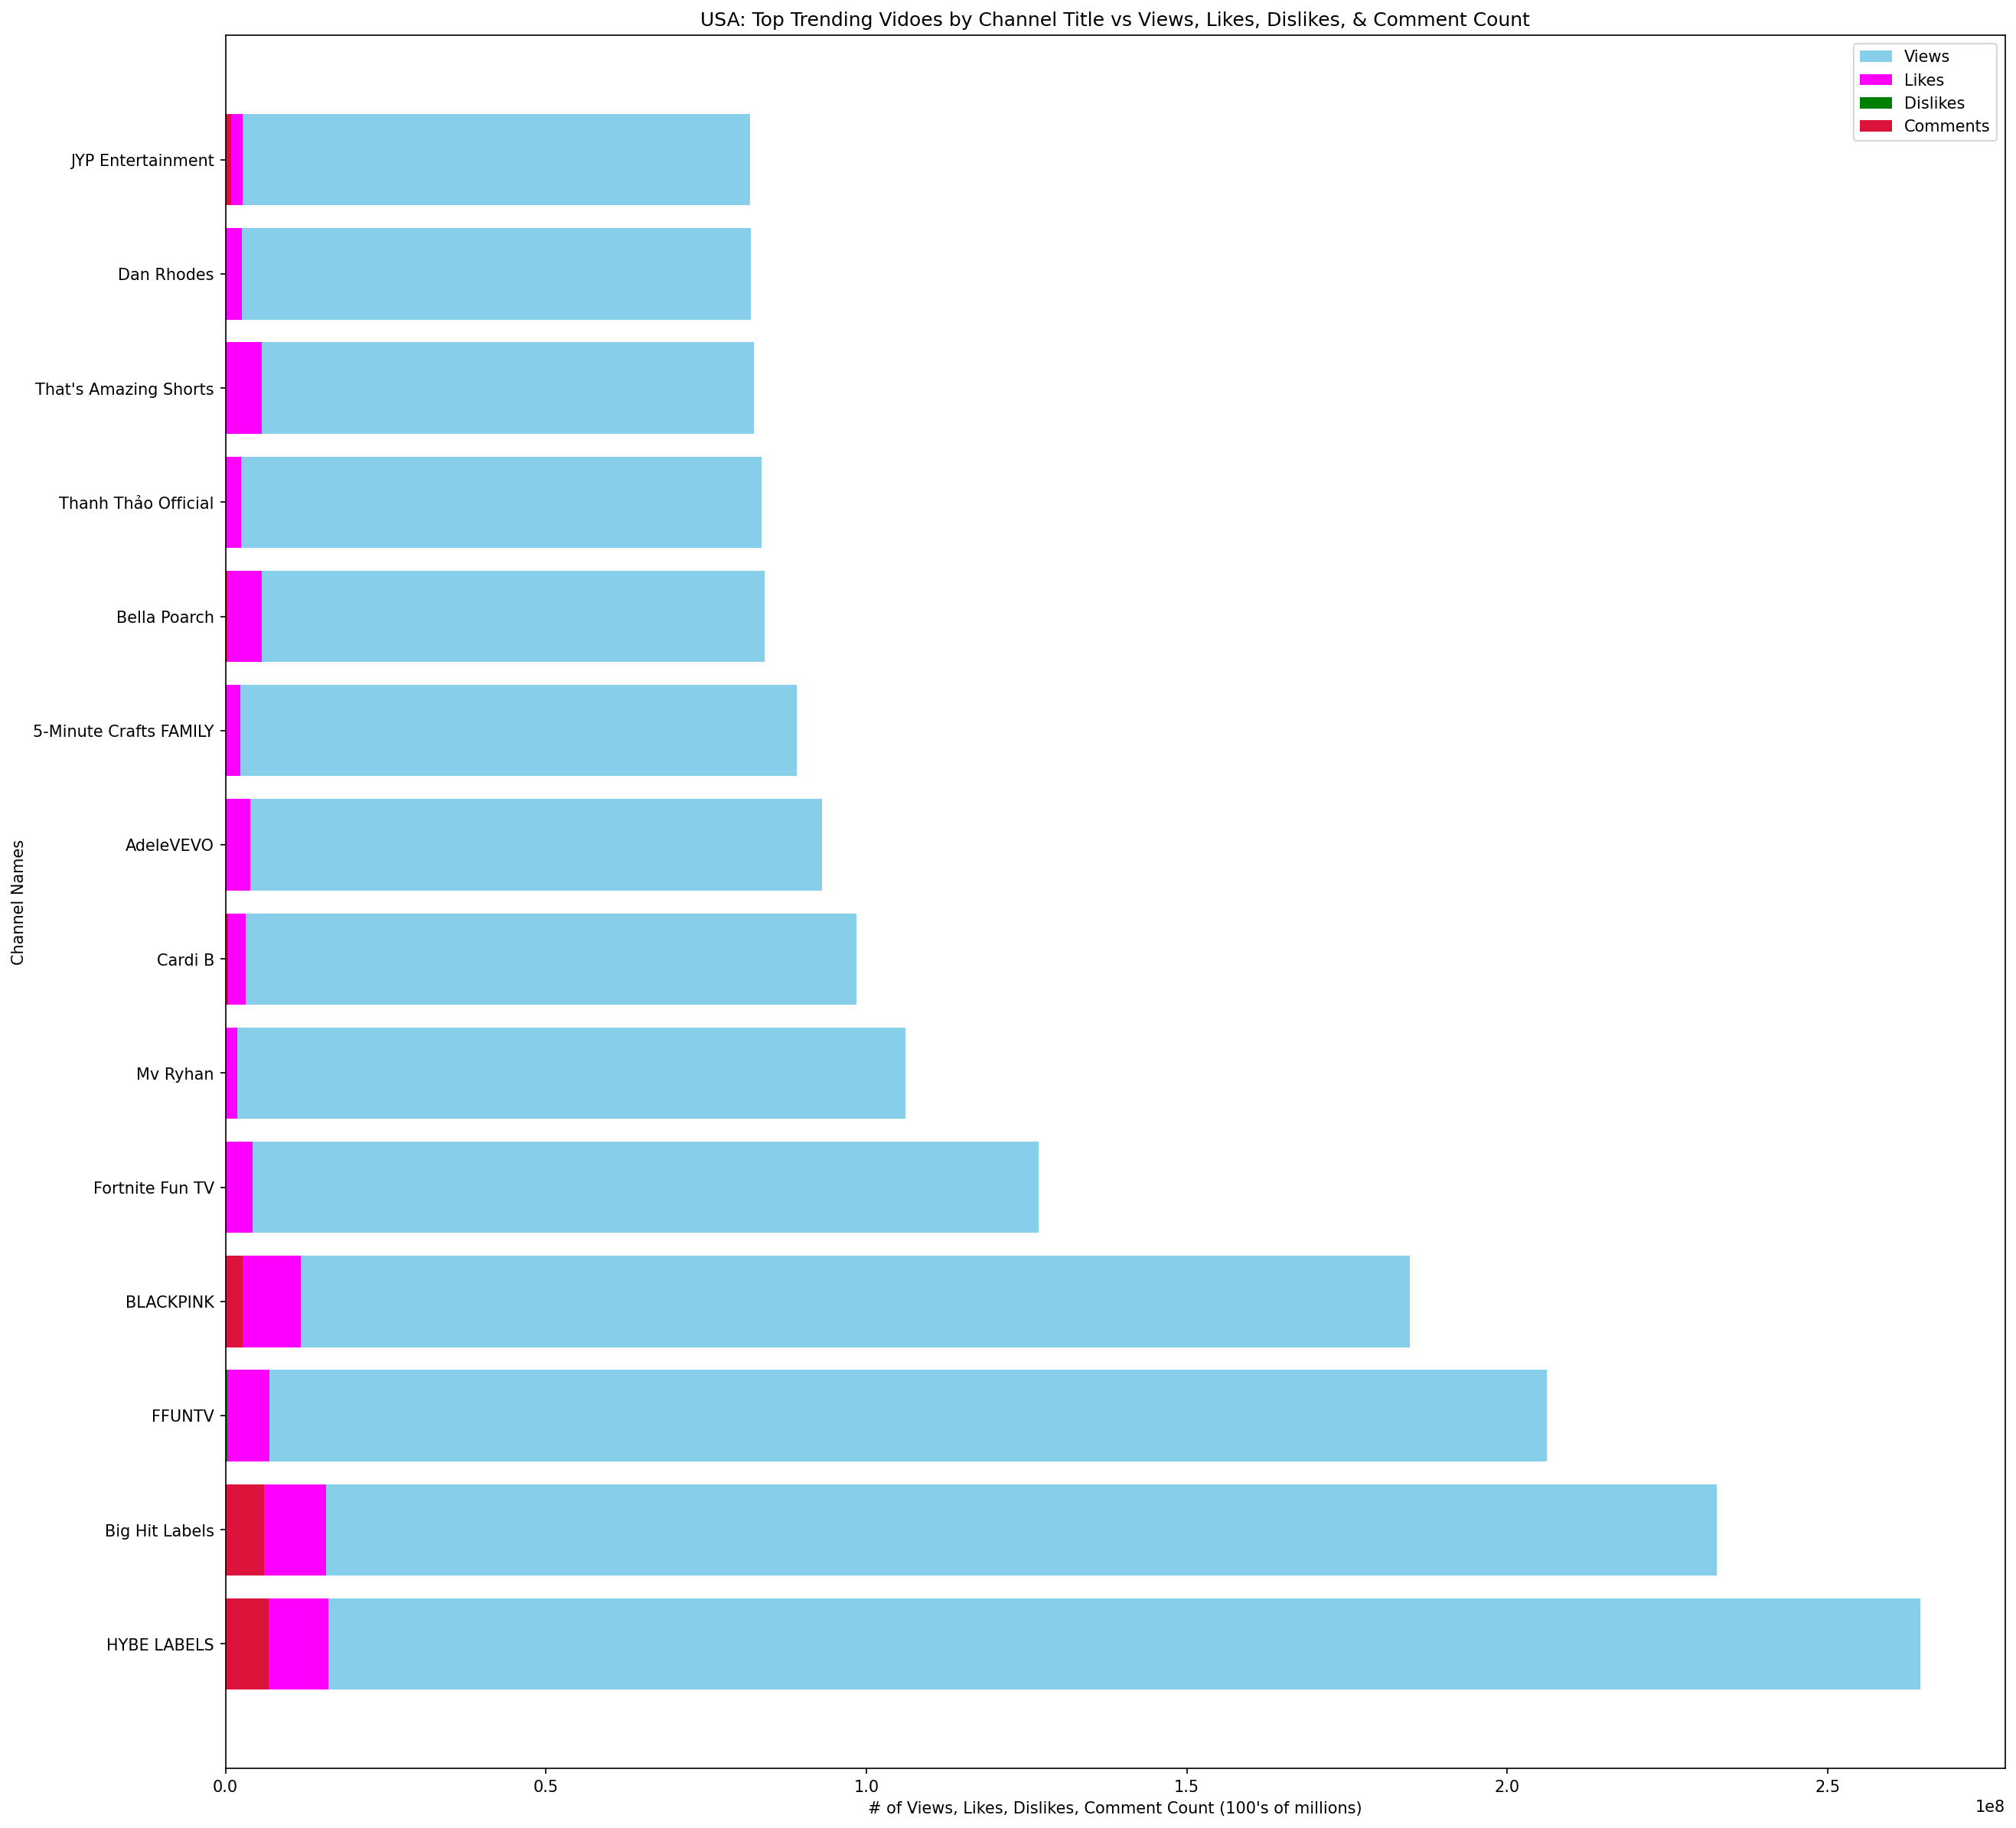

In [38]:
#US and graph
us_x=ttv_us_20['channelTitle']
us_y=ttv_us_20['view_count']
us_y2=ttv_us_20['likes']
us_y3=ttv_us_20['dislikes']
us_y4=ttv_us_20['comment_count']

plt.figure(num=1,figsize=(20,20),dpi=150)
plt.barh(us_x,us_y, linewidth=0.3,color='skyblue',label="Views")
plt.barh(us_x,us_y2,linewidth=0.3, color='magenta',label="Likes")
plt.barh(us_x,us_y3,linewidth=0.3, color='green',label="Dislikes")
plt.barh(us_x,us_y4,linewidth=0.3, color='crimson',label="Comments")
plt.title("USA: Top Trending Vidoes by Channel Title vs Views, Likes, Dislikes, & Comment Count")
plt.xlabel("# of Views, Likes, Dislikes, Comment Count (100's of millions)")
plt.ylabel("Channel Names")
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

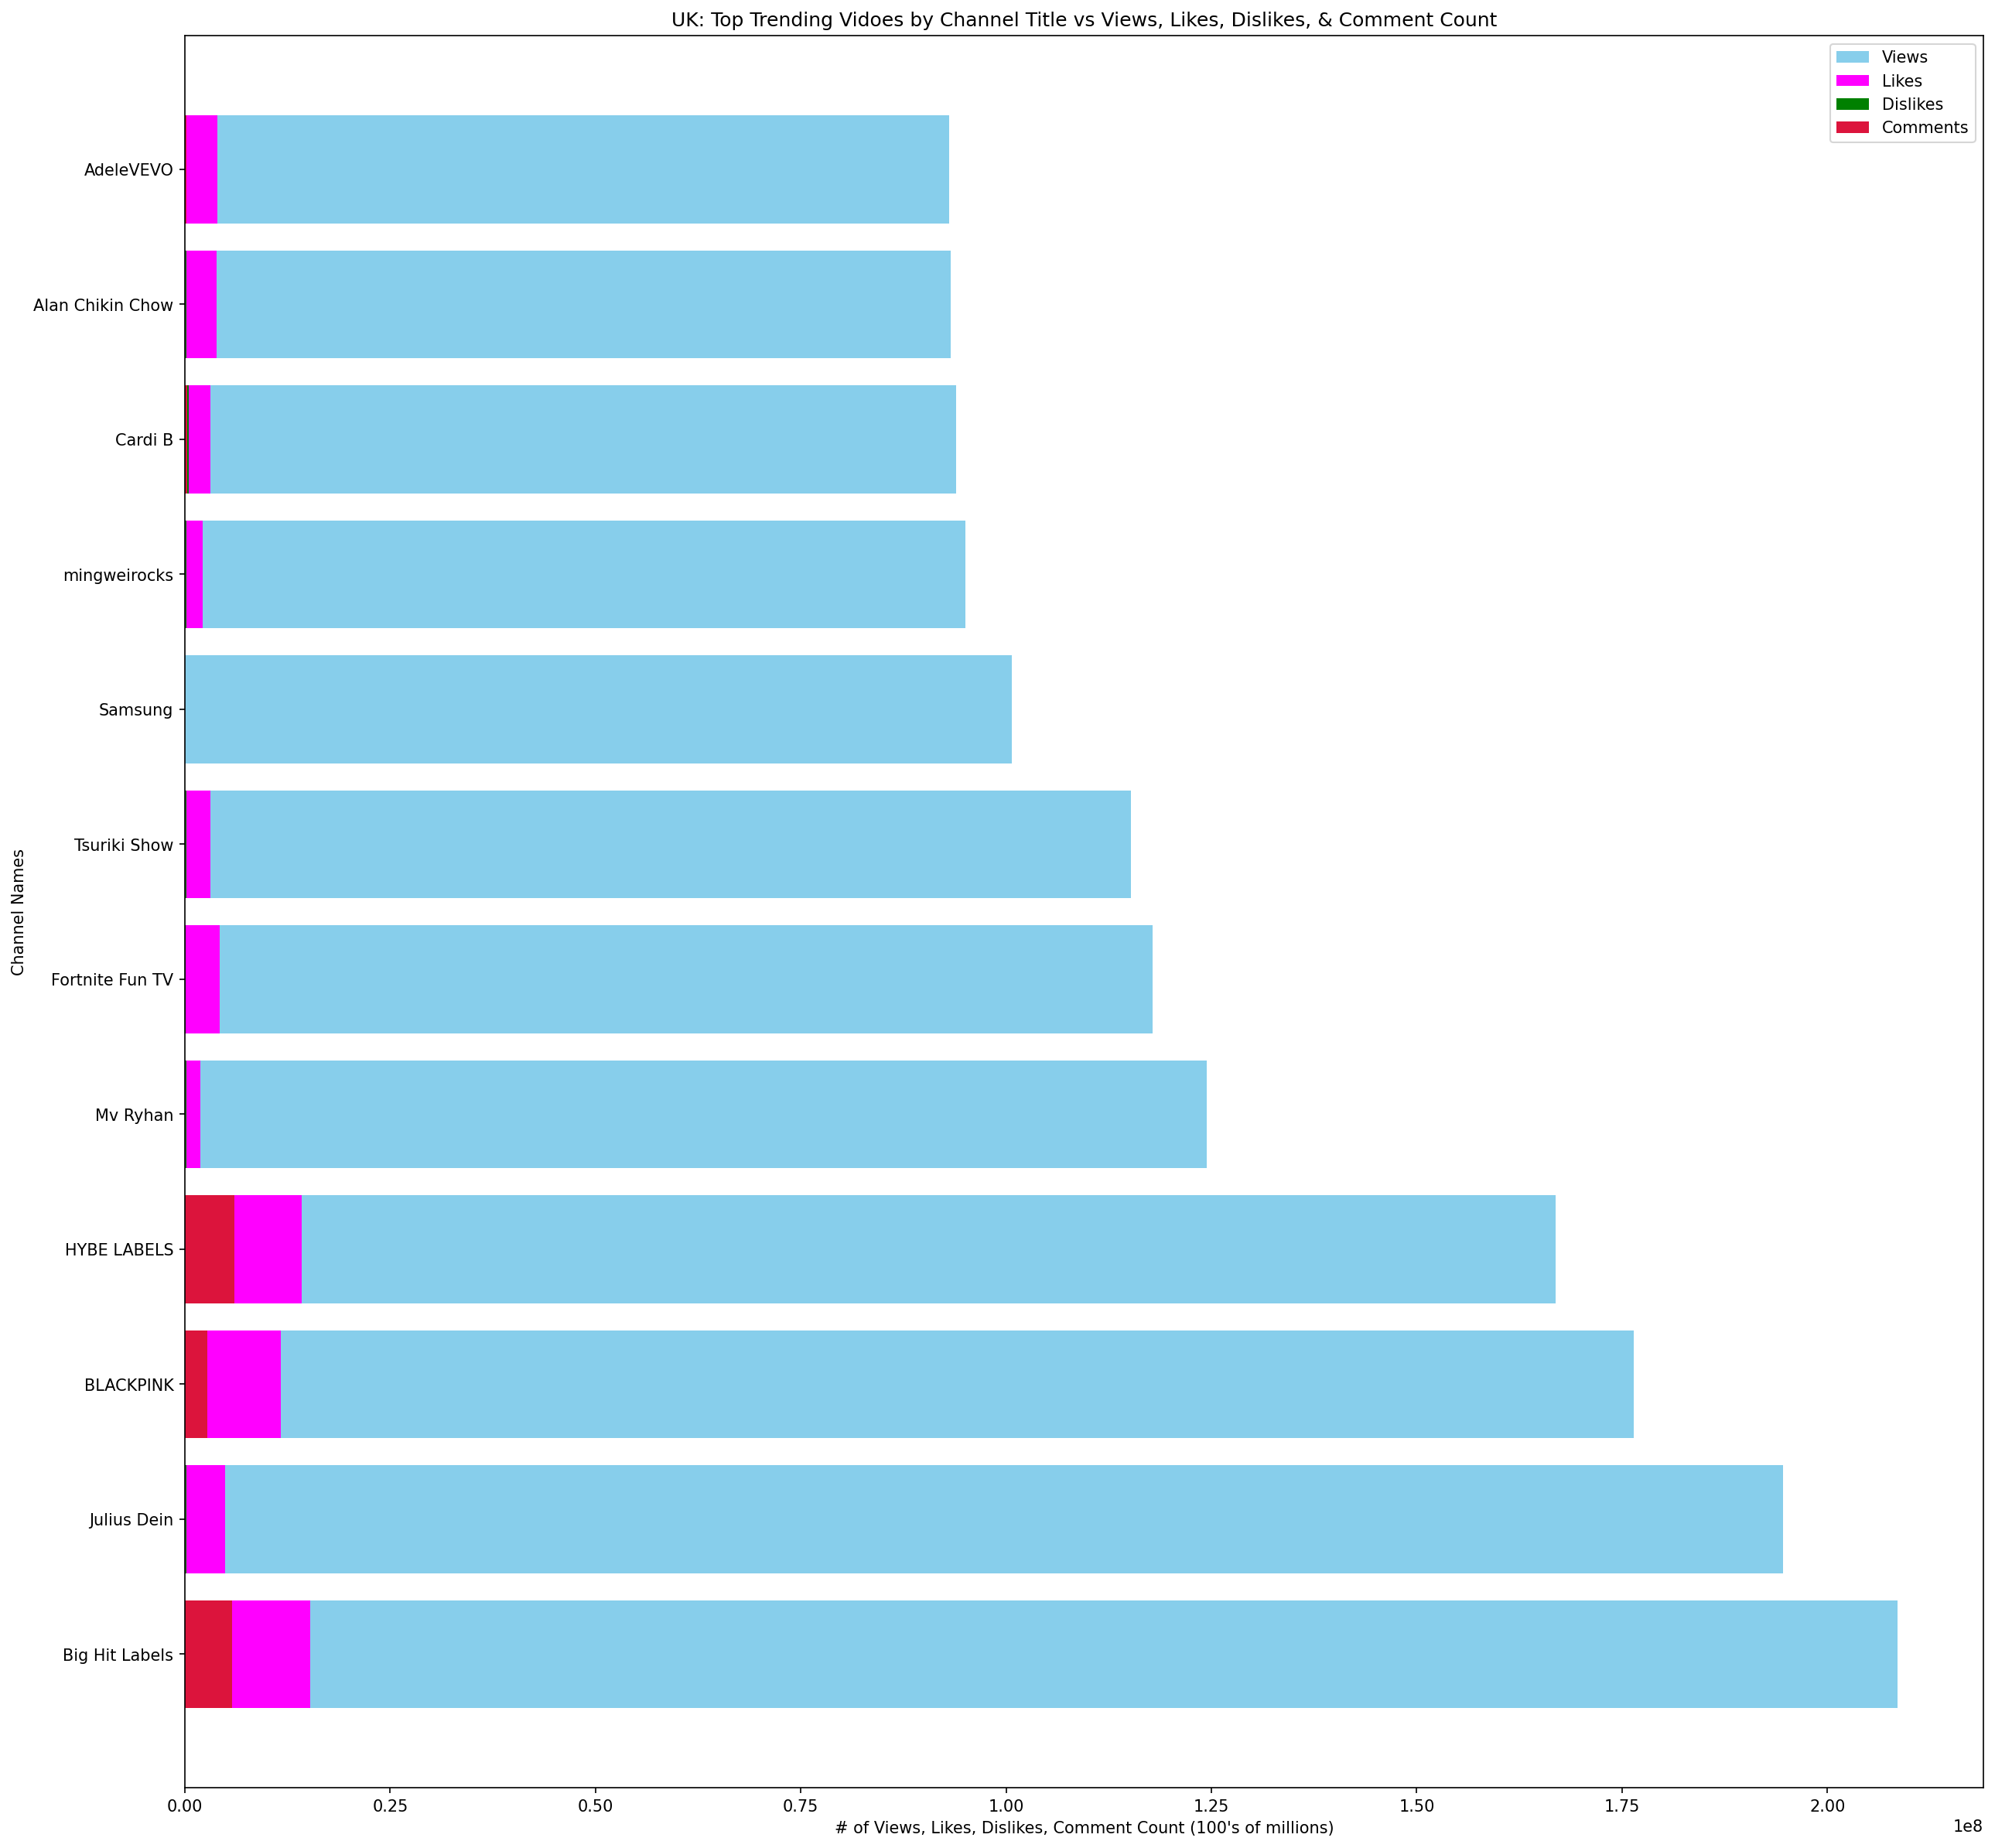

In [39]:
#GB and graph stacked bar

gb_x=ttv_gb_20['channelTitle']
gb_y=ttv_gb_20['view_count']
gb_y2=ttv_gb_20['likes']
gb_y3=ttv_gb_20['dislikes']
gb_y4=ttv_gb_20['comment_count']

plt.figure(num=2,figsize=(20,20),dpi=150)
plt.barh(gb_x,gb_y, linewidth=0.3,color='skyblue',label="Views")
plt.barh(gb_x,gb_y2,linewidth=0.3, color='magenta',label="Likes")
plt.barh(gb_x,gb_y3,linewidth=0.3, color='green',label="Dislikes")
plt.barh(gb_x,gb_y4,linewidth=0.3, color='crimson',label="Comments")
plt.title("UK: Top Trending Vidoes by Channel Title vs Views, Likes, Dislikes, & Comment Count")
plt.xlabel("# of Views, Likes, Dislikes, Comment Count (100's of millions)")
plt.ylabel("Channel Names")
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

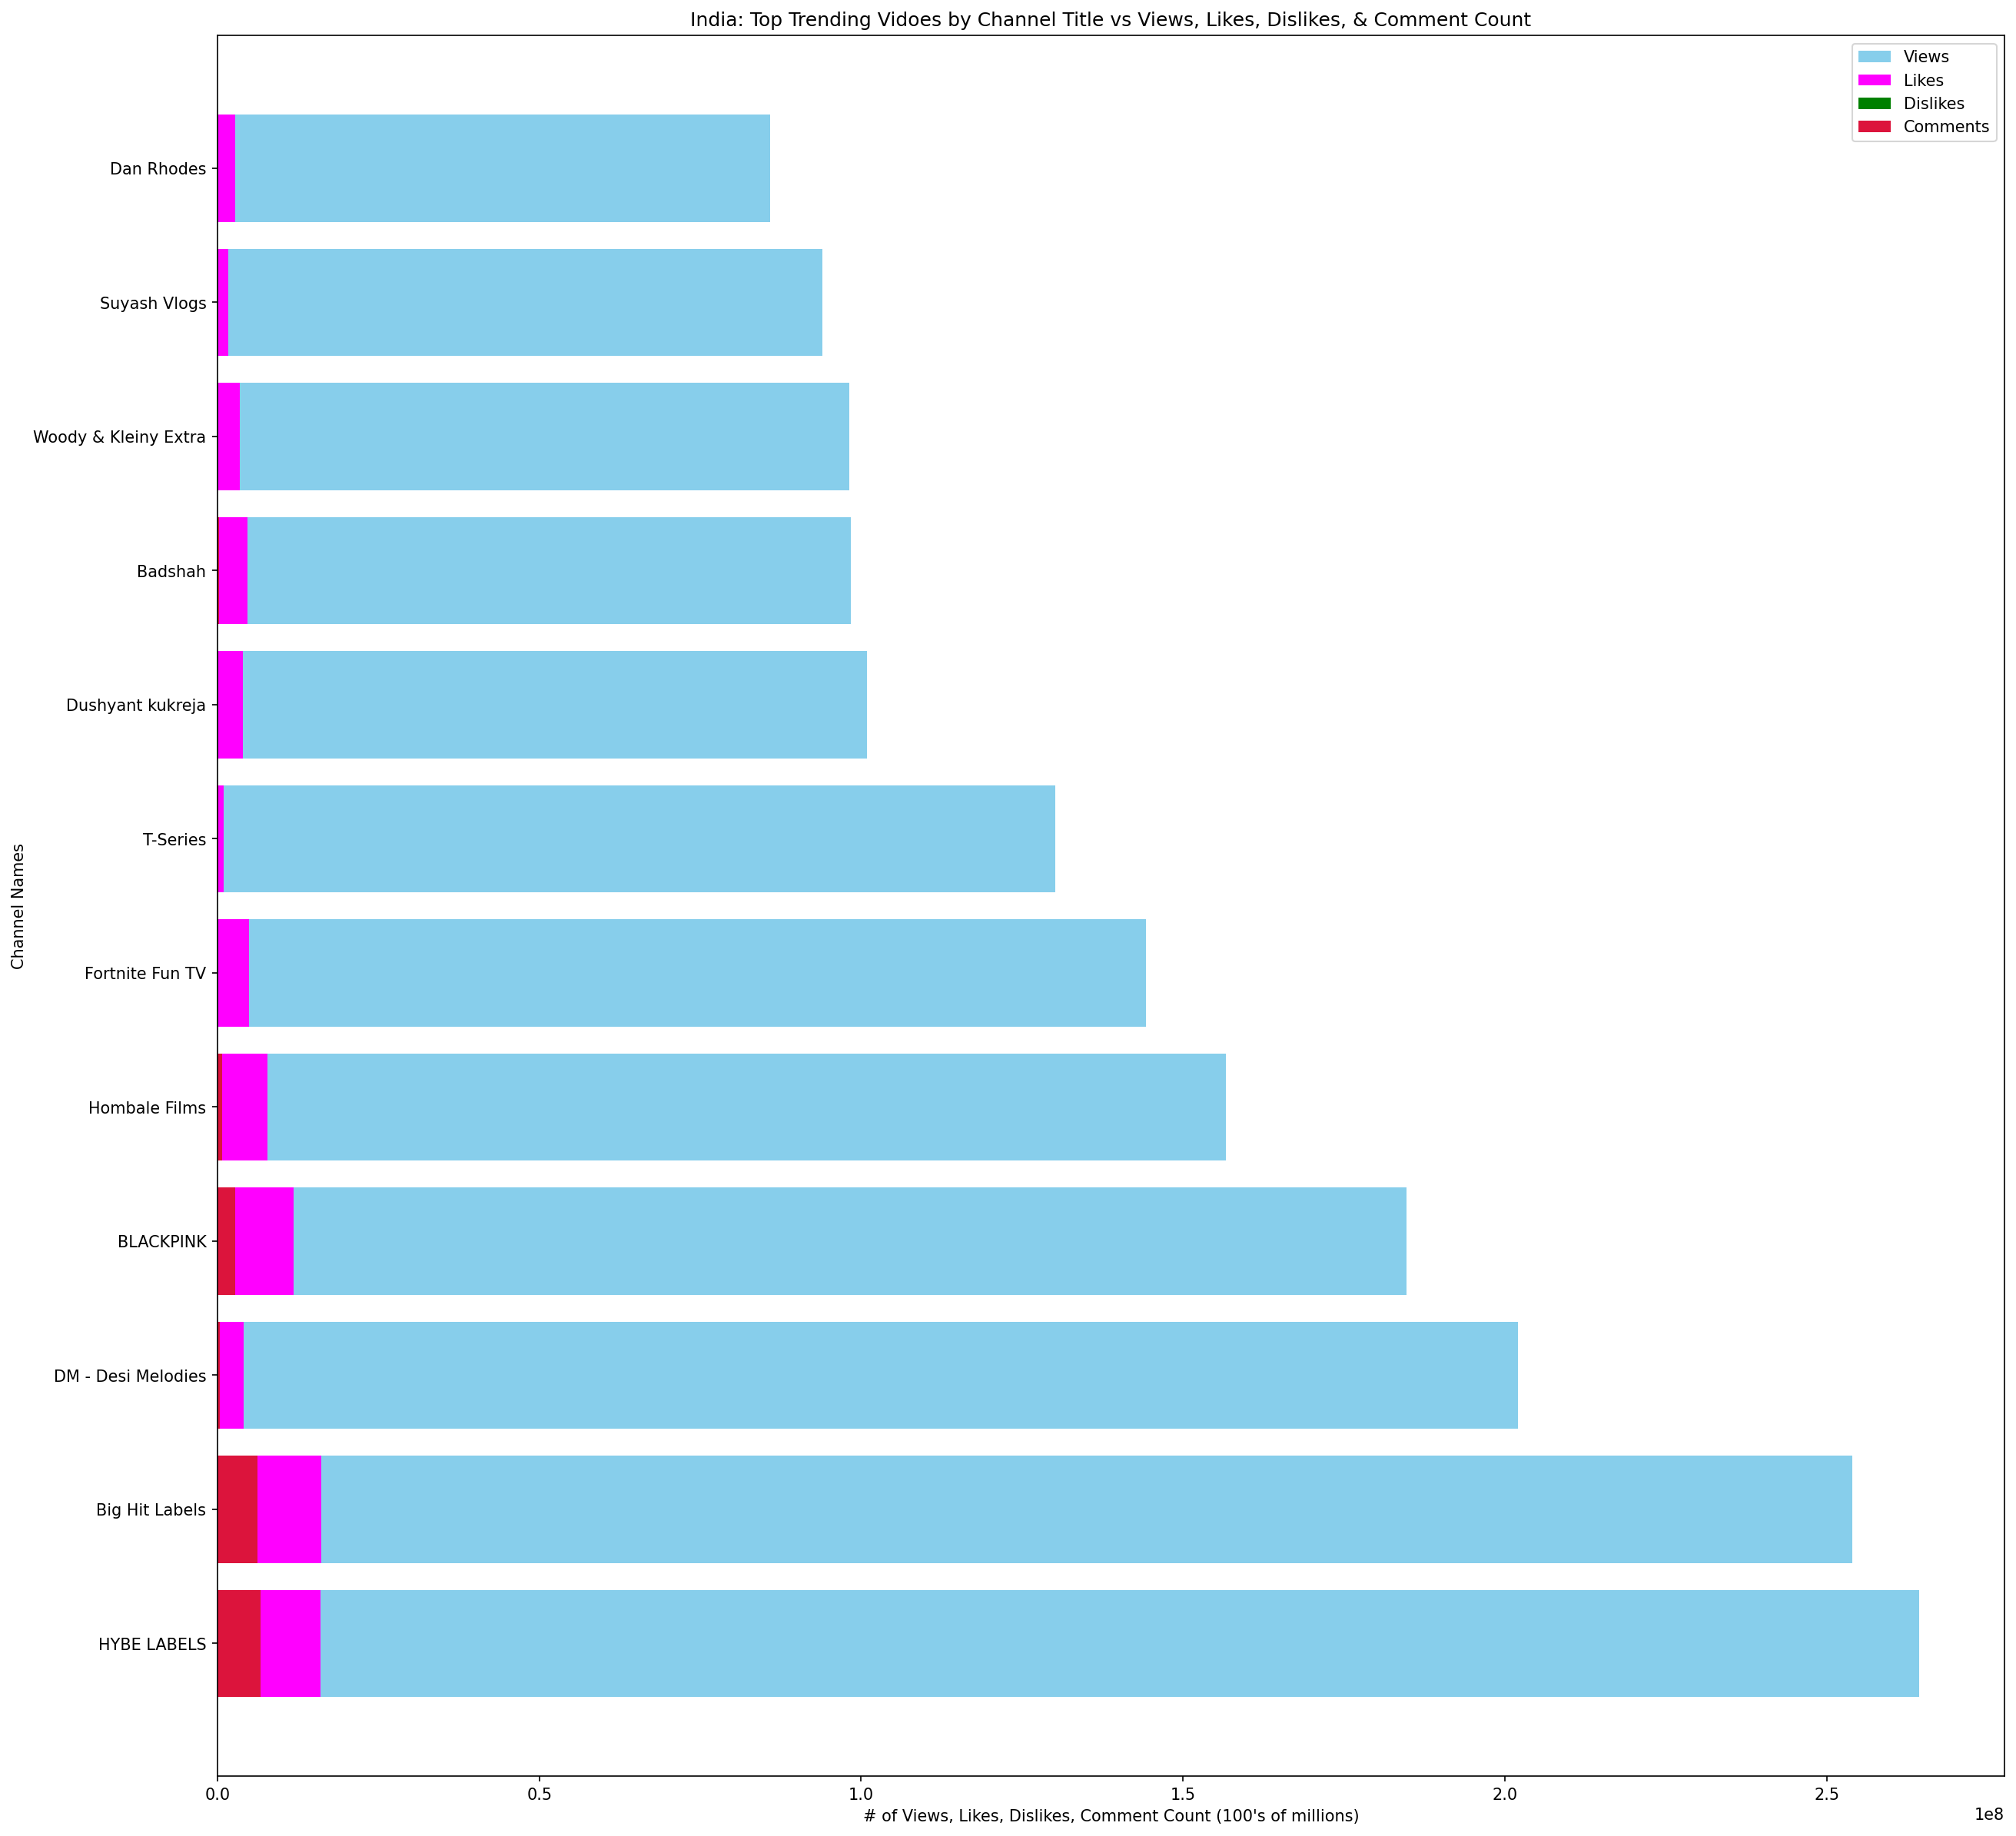

In [40]:
#India
in_x=ttv_in_20['channelTitle']
in_y=ttv_in_20['view_count']
in_y2=ttv_in_20['likes']
in_y3=ttv_in_20['dislikes']
in_y4=ttv_in_20['comment_count']


plt.figure(num=3,figsize=(20,20),dpi=150)
plt.barh(in_x,in_y, linewidth=0.3,color='skyblue',label="Views")
plt.barh(in_x,in_y2,linewidth=0.3, color='magenta',label="Likes")
plt.barh(in_x,in_y3,linewidth=0.3, color='green',label="Dislikes")
plt.barh(in_x,in_y4,linewidth=0.3, color='crimson',label="Comments")
plt.title("India: Top Trending Vidoes by Channel Title vs Views, Likes, Dislikes, & Comment Count")
plt.xlabel("# of Views, Likes, Dislikes, Comment Count (100's of millions)")
plt.ylabel("Channel Names")
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

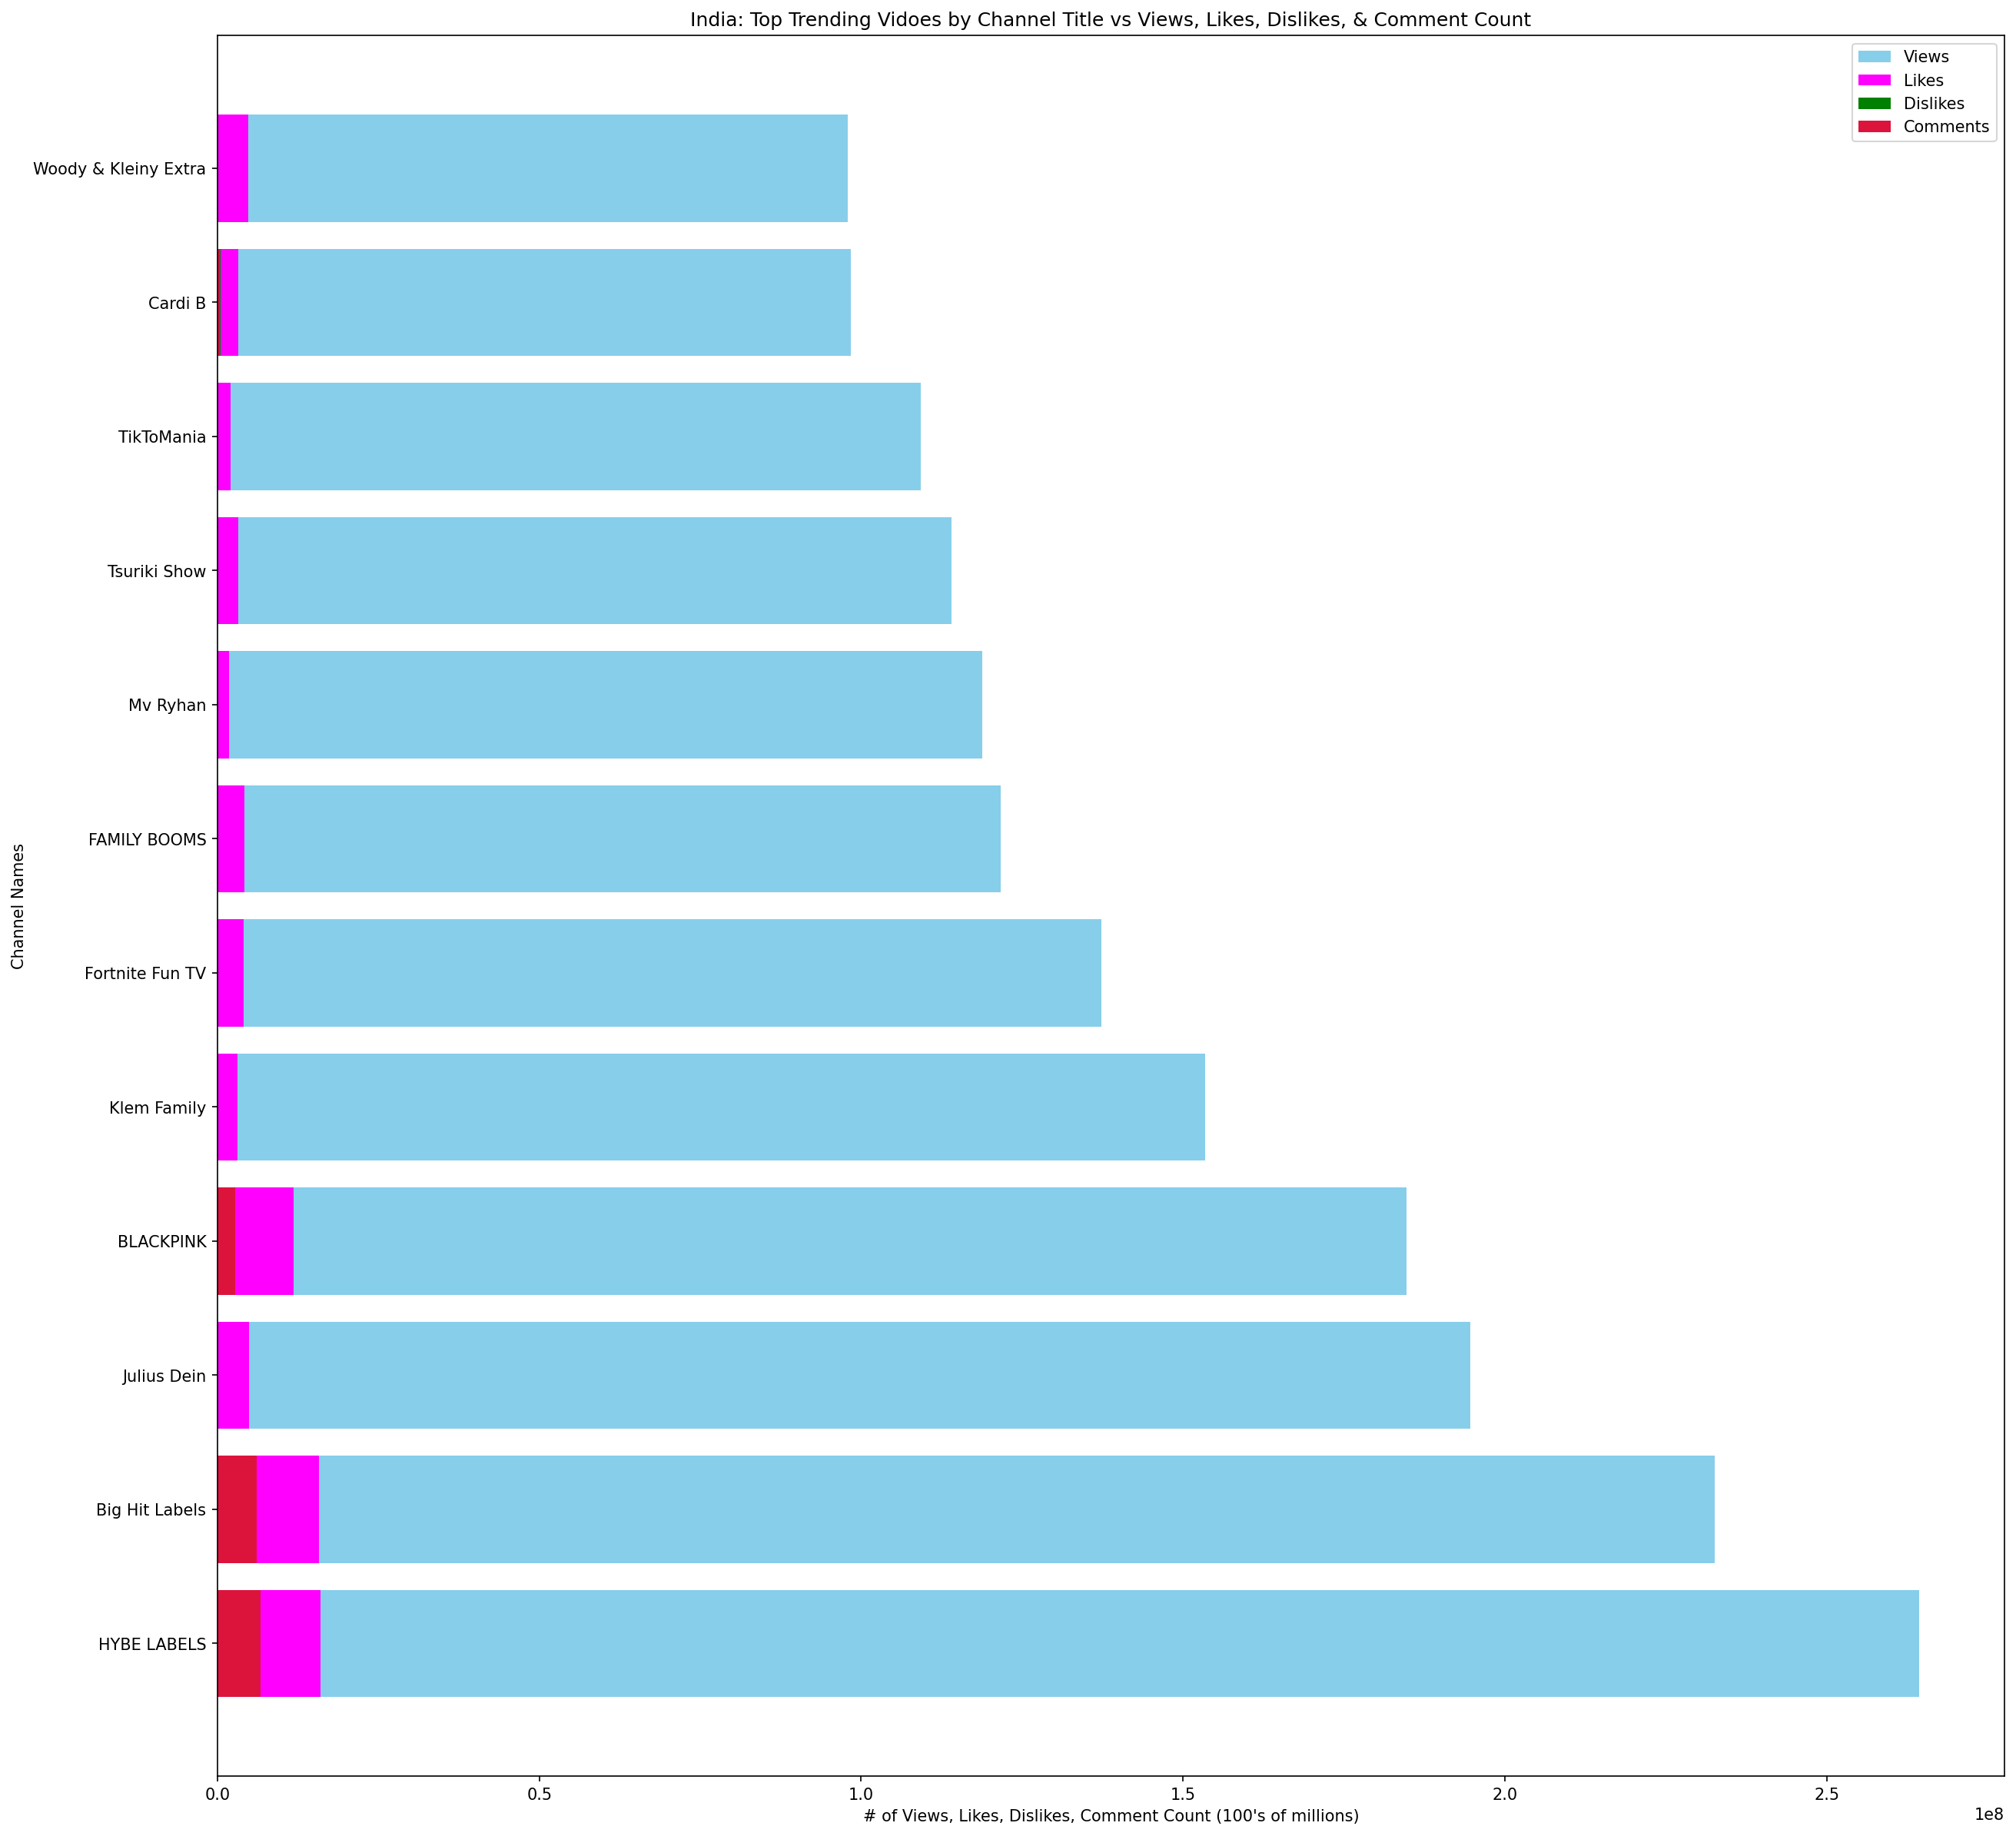

In [41]:
#Canada
ca_x=ttv_ca_20['channelTitle']
ca_y=ttv_ca_20['view_count']
ca_y2=ttv_ca_20['likes']
ca_y3=ttv_ca_20['dislikes']
ca_y4=ttv_ca_20['comment_count']


plt.figure(num=4,figsize=(20,20),dpi=150)
plt.barh(ca_x,ca_y, linewidth=0.3,color='skyblue',label="Views")
plt.barh(ca_x,ca_y2,linewidth=0.3, color='magenta',label="Likes")
plt.barh(ca_x,ca_y3,linewidth=0.3, color='green',label="Dislikes")
plt.barh(ca_x,ca_y4,linewidth=0.3, color='crimson',label="Comments")
plt.title("India: Top Trending Vidoes by Channel Title vs Views, Likes, Dislikes, & Comment Count")
plt.xlabel("# of Views, Likes, Dislikes, Comment Count (100's of millions)")
plt.ylabel("Channel Names")
plt.legend()

plt.show

In [166]:
#locate mr beast videos
mrbeast = ttv_us.loc[ttv_us['channelTitle']=='MrBeast']
mrbeast

video_id                                              title  \
12570  9bqk6ZUsKyA                      I Spent 50 Hours Buried Alive   
9      zxYjTTXc-J8                 Last To Leave Circle Wins $500,000   
5901   ayXxwJJId_c  I Bought The World's Largest Mystery Box! ($50...   
4892   fMfipiV_17o               Would You Sit In Snakes For $10,000?   
1239   uocETPj4Jx4                      Extreme $500,000 Game Of Tag!   
7909   TQHEJj68Jew                 I Put A $100,000 Bounty On My Head   
11542  DuQbOQwVaNE         Offering People $100,000 To Quit Their Job   
7182   WcwGleN38zE                      Extreme $100,000 Game of Tag!   
11989  C680oxL__ck                    I Ate $100,000 Golden Ice Cream   
9696   LeYsRMZFUq0  I Gave People $1,000,000 But ONLY 1 Minute To ...   
8843   PKtnafFtfEo           Youtube Rewind 2020, Thank God It's Over   
4258   hxwpkM5w3Cc                            I Got Hunted By The FBI   
11496  E6E22XQPhhg  Anything You Can Fit In The Triangle I’ll Pay For   
2960   nM89Wl03Q4g                         I Spent 50 Hours In Prison   
5274   dg2Ag3e8W-Q   I Opened A Restaurant That Pays You To Eat At It   
9220   NkE0AMGzpJY             Last To Leave $800,000 Island Keeps It   
13590  5Fg9oZk-5uA                    I Bought Everything In 5 Stores   
9264   NZlClr_ivb4                       Make THIS Shot, Win $300,000   
11130  FbM1yi4mMMc                          I Bought A Private Island   
4976   f0c7pSCoZqE  I Put 1,000,000 Christmas Lights On A House (W...   
1231   urtFrxDUV6c                Would YOU Quit School For $100,000?   
11604  Dc2ZRmuH5OM           Steal This $100,000 Diamond, You Keep It   
7715   UE5AHE2Ypr8          I Gave My 40,000,000th Subscriber 40 Cars   
1130   vJH28ICkCdU                              Selling Houses For $1   
3551   ktyJIj6i4Qw           If You Can Carry $1,000,000 You Keep It!   
1000   vp5sSqyZ5Go  I Filled My Brother’s House With Slime & Bough...   
8118   SZQhgExjBvQ                I Survived 24 Hours Straight In Ice   
5599   cExLQ1o2pDw                    First To Rob Bank Wins $100,000   
13534  5V2B28OqfqM      I Spent $1,000,000 On Lottery Tickets and WON   
10946  GLoeAJUcz38                 Press This Button To Win $100,000!   
14537  1V_03efSkg0             $300,000 Influencer Trivia Tournament!   
6163   _uwNDiU04zE                           Press Subscribe For $.10   
12397  AKJfakEsgy0                                   Hi Me In 5 Years   
7964   TDiXxsQ0w2Q                       Why I Haven’t Been Uploading   
1884   s1ax8Tx_Jz0  Would YOU Rather Have A Lamborghini or This Ho...   
7354   Vl3swga-Xrk  Would You Rather Have A Giant Diamond or $100,...   
2765   oD155zWANQg       Get This Random Person 1,000,000 Subscribers   
10344  IoZri9hq7z4          I Uber’d People And Let Them Keep The Car   

                publishedAt                 channelId channelTitle  \
12570  2021-03-27T20:00:04Z  UCX6OQ3DkcsbYNE6H8uQQuVA      MrBeast   
9      2021-08-31T20:01:03Z  UCX6OQ3DkcsbYNE6H8uQQuVA      MrBeast   
5901   2021-04-03T20:00:01Z  UCX6OQ3DkcsbYNE6H8uQQuVA      MrBeast   
4892   2021-04-10T21:00:07Z  UCX6OQ3DkcsbYNE6H8uQQuVA      MrBeast   
1239   2021-09-04T20:00:07Z  UCX6OQ3DkcsbYNE6H8uQQuVA      MrBeast   
7909   2021-04-24T20:00:00Z  UCX6OQ3DkcsbYNE6H8uQQuVA      MrBeast   
11542  2021-03-13T21:00:02Z  UCX6OQ3DkcsbYNE6H8uQQuVA      MrBeast   
7182   2021-04-17T20:00:00Z  UCX6OQ3DkcsbYNE6H8uQQuVA      MrBeast   
11989  2021-01-22T21:00:03Z  UCX6OQ3DkcsbYNE6H8uQQuVA      MrBeast   
9696   2020-12-15T21:00:11Z  UCX6OQ3DkcsbYNE6H8uQQuVA      MrBeast   
8843   2021-01-01T21:00:03Z  UCX6OQ3DkcsbYNE6H8uQQuVA      MrBeast   
4258   2021-08-07T23:00:03Z  UCX6OQ3DkcsbYNE6H8uQQuVA      MrBeast   
11496  2021-06-01T20:00:02Z  UCX6OQ3DkcsbYNE6H8uQQuVA      MrBeast   
2960   2021-06-26T20:00:02Z  UCX6OQ3DkcsbYNE6H8uQQuVA      MrBeast   
5274   2020-12-19T22:00:03Z  UCX6OQ3DkcsbYNE6H8uQQuVA      MrBeast   
9220   2020-08-15T20:00:02Z  UCX6OQ3DkcsbY

In [101]:
#tags to list format for counter of tag occurences
us_tag_words = list(ttv_us["tags"].apply(lambda x: x.split('|')))
us_tag_words = [x for y in us_tag_words for x in y]
us_counter_tags = dict(Counter(us_tag_words).most_common(200))

gb_tag_words = list(ttv_gb["tags"].apply(lambda x: x.split('|')))
gb_tag_words = [x for y in gb_tag_words for x in y]
gb_counter_tags = dict(Counter(gb_tag_words).most_common(200))

in_tag_words = list(ttv_in["tags"].apply(lambda x: x.split('|')))
in_tag_words = [x for y in in_tag_words for x in y]
in_counter_tags = dict(Counter(in_tag_words).most_common(200))

ca_tag_words = list(ttv_ca["tags"].apply(lambda x: x.split('|')))
ca_tag_words = [x for y in ca_tag_words for x in y]
ca_counter_tags = dict(Counter(ca_tag_words).most_common(200))


#https://towardsdatascience.com/how-to-create-beautiful-word-clouds-in-python-cfcf85141214
#https://www.datacamp.com/community/tutorials/wordcloud-python

#configuring masks for word cloud

yt_mask2 = np.array(Image.open('resources/logo2.png'))
yt_mask = np.array(Image.open('resources/logo.png'))
yt_mask3 = np.array(Image.open('resources/logo3.png'))
yt_mask4 = np.array(Image.open('resources/logo4.png'))


yt_mask


array([[[255, 255, 255, 100],
        [255, 255, 255, 100],
        [255, 255, 255, 100],
        ...,
        [255, 255, 255, 100],
        [255, 255, 255, 100],
        [255, 255, 255, 100]],

       [[255, 255, 255, 100],
        [255, 255, 255, 100],
        [255, 255, 255, 100],
        ...,
        [255, 255, 255, 100],
        [255, 255, 255, 100],
        [255, 255, 255, 100]],

       [[255, 255, 255, 100],
        [255, 255, 255, 100],
        [255, 255, 255, 100],
        ...,
        [255, 255, 255, 100],
        [255, 255, 255, 100],
        [255, 255, 255, 100]],

       ...,

       [[255, 255, 255, 100],
        [255, 255, 255, 100],
        [255, 255, 255, 100],
        ...,
        [255, 255, 255, 100],
        [255, 255, 255, 100],
        [255, 255, 255, 100]],

       [[255, 255, 255, 100],
        [255, 255, 255, 100],
        [255, 255, 255, 100],
        ...,
        [255, 255, 255, 100],
        [255, 255, 255, 100],
        [255, 255, 255, 100]],

       [[255

In [47]:
yt_mask2

array([[[248, 248, 248],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [247, 247, 247]],

       [[247, 247, 247],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [247, 247, 247]],

       ...,

       [[247, 247, 247],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [247, 247, 247]],

       [[247, 247, 247],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [247, 247, 247]],

       [[248, 248, 248],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [247, 247, 247]]

In [172]:
stopwords2=['|','-','The','the','&','I','.',',','to','in','a','A','of','on','and','To','is','1','2','3','4','5','6','7','8','9','+']

In [84]:
# 'oranges' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 
# 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
# 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 
# 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 
# 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 
# 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r',
# 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r',
# 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 
# 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r',
# 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat',
# 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 
# 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno',
# 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 
# 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 
# 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 
# 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
# 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [77]:
#setup stopwords

stopword=['[None]','None','',' ']



Frequency of Specific Words in Tags of Trending YT Videos from the United States of America


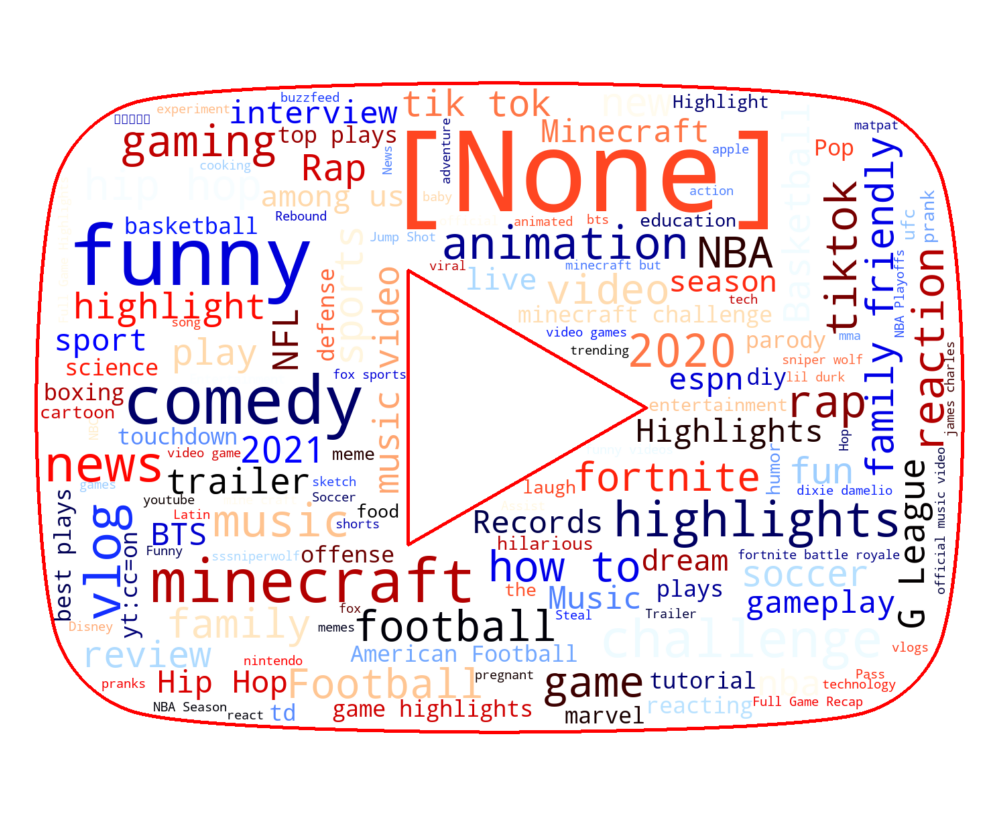

In [121]:
#Wordcloud
print("Frequency of Specific Words in Tags of Trending YT Videos from the United States of America")
wc = WordCloud(background_color="white", max_words=150, mask=yt_mask4, colormap='flag',
                stopwords=stopword,contour_width=5, contour_color='red')

wc.generate_from_frequencies(us_counter_tags)

wc.to_file("output/yt_us_logo_tags_wc.png")

# show
plt.figure(figsize=[20,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()



Frequency of Specific Words in Tags of Trending YT Videos from India


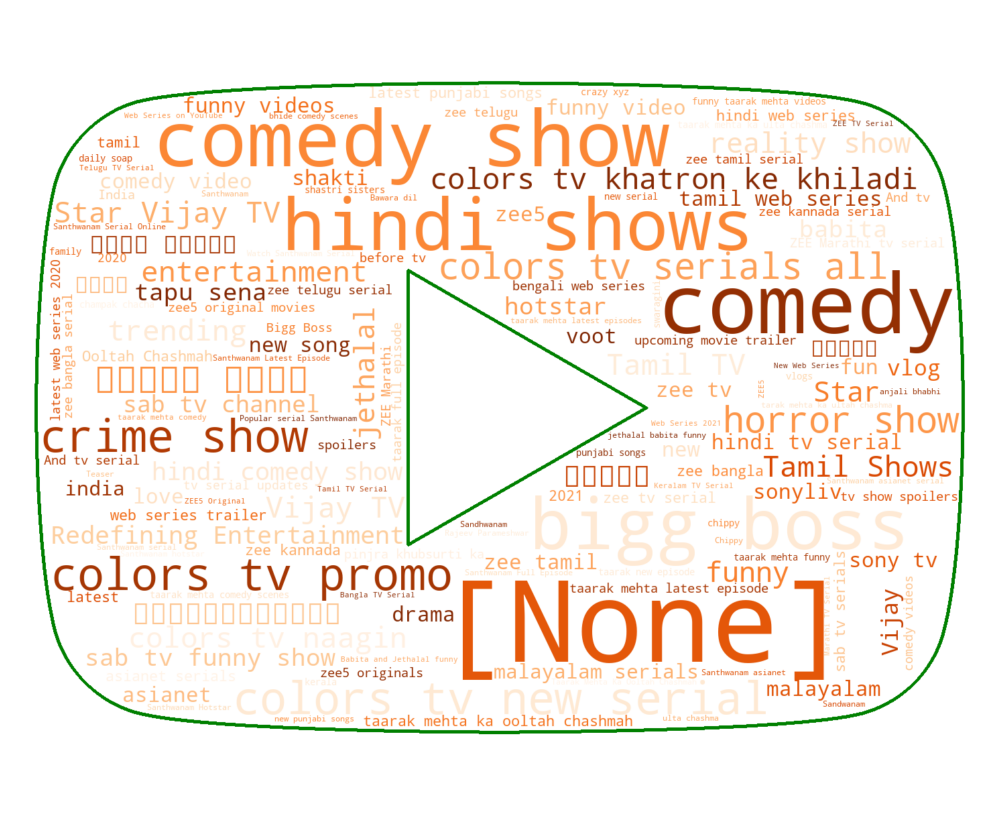

In [122]:
#India
print("Frequency of Specific Words in Tags of Trending YT Videos from India")
wc_in = WordCloud(background_color="white", max_words=150, mask=yt_mask4, colormap='Oranges',
                stopwords=stopword,contour_width=5, contour_color='green')

wc_in.generate_from_frequencies(in_counter_tags)

wc_in.to_file("output/yt_in_logo_tags_wc.png")

# show
plt.figure(figsize=[20,15])
plt.imshow(wc_in, interpolation='bilinear')
plt.axis("off")
plt.show()

Frequency of Specific Words in Tags of Trending YT Videos from Great Britain


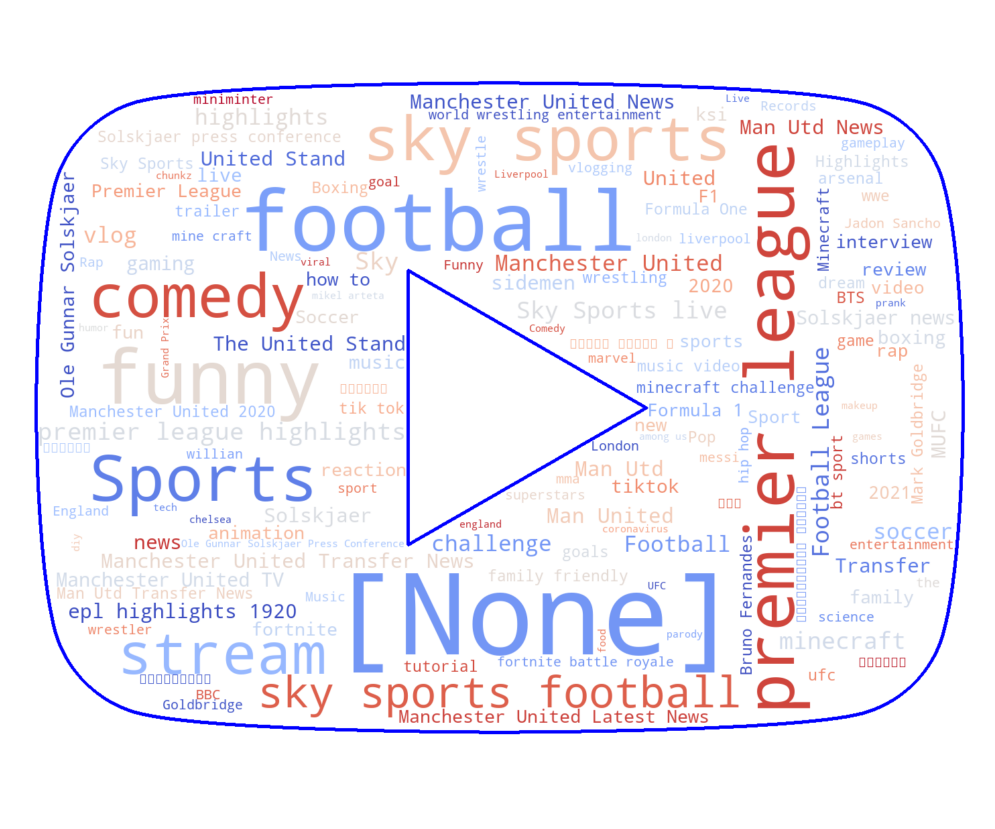

In [123]:
#GB or UK
print("Frequency of Specific Words in Tags of Trending YT Videos from Great Britain")
wc_gb = WordCloud(background_color="white", max_words=150, mask=yt_mask4, colormap='coolwarm',
                stopwords=stopword,contour_width=5, contour_color='blue')

wc_gb.generate_from_frequencies(gb_counter_tags)

wc_gb.to_file("output/yt_gb_logo_tags_wc.png")

# show
plt.figure(figsize=[20,15])
plt.imshow(wc_gb, interpolation='bilinear')
plt.axis("off")
plt.show()



Frequency of Specific Words in Tags of Trending YT Videos from Canada


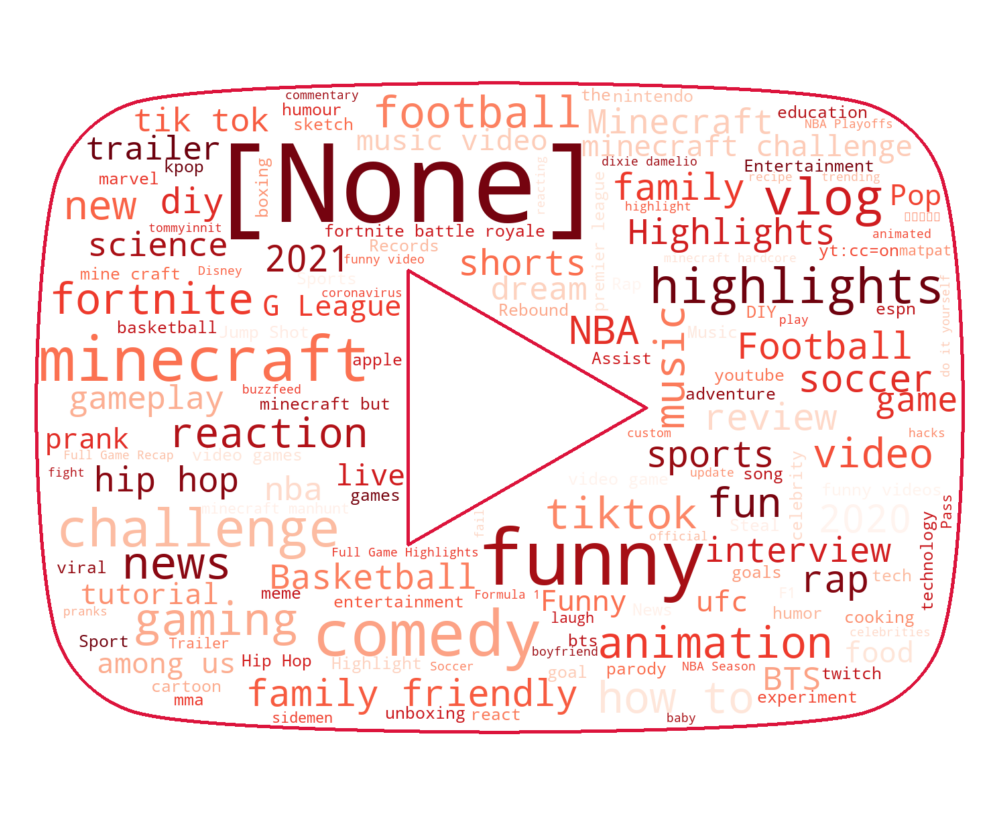

In [124]:
#Canada
print("Frequency of Specific Words in Tags of Trending YT Videos from Canada")
wc_ca = WordCloud(background_color="white", max_words=150, mask=yt_mask4, colormap='Reds',
                stopwords=stopword,contour_width=5, contour_color='crimson')

wc_ca.generate_from_frequencies(ca_counter_tags)

wc_ca.to_file("output/yt_ca_logo_tags_wc.png")

# show
plt.figure(figsize=[20,15])
plt.imshow(wc_ca, interpolation='bilinear')
plt.axis("off")
plt.show()


In [112]:
stopwords2=['|','-','The','the','&','I','.',',','to','in','a','A','of','on','and','To','is','1','2','3','4','5','6','7','8','9','+']


#Words in titles to list format
us_title_words = list(ttv_us["title"].apply(lambda x: x.split(' ')))
us_title_words = [x for y in us_title_words for x in y]
us_counter_title = dict(Counter(us_title_words).most_common(500))

gb_title_words = list(ttv_gb["title"].apply(lambda x: x.split(' ')))
gb_title_words = [x for y in gb_title_words for x in y]
gb_counter_title = dict(Counter(gb_title_words).most_common(500))

in_title_words = list(ttv_in["title"].apply(lambda x: x.split(' ')))
in_title_words = [x for y in in_title_words for x in y]
in_counter_title = dict(Counter(in_title_words).most_common(500))

ca_title_words = list(ttv_ca["title"].apply(lambda x: x.split(' ')))
ca_title_words = [x for y in ca_title_words for x in y]
ca_counter_title = dict(Counter(ca_title_words).most_common(500))



In [156]:
stopwords2={'|','-','The','the','&','I','.',',','to','in','a','A','of','on','and','To','is','1','2','3','4','5','6','7','8','9','+'}

Frequency of Specific Words in Titles of Trending YT Videos from the United States of America


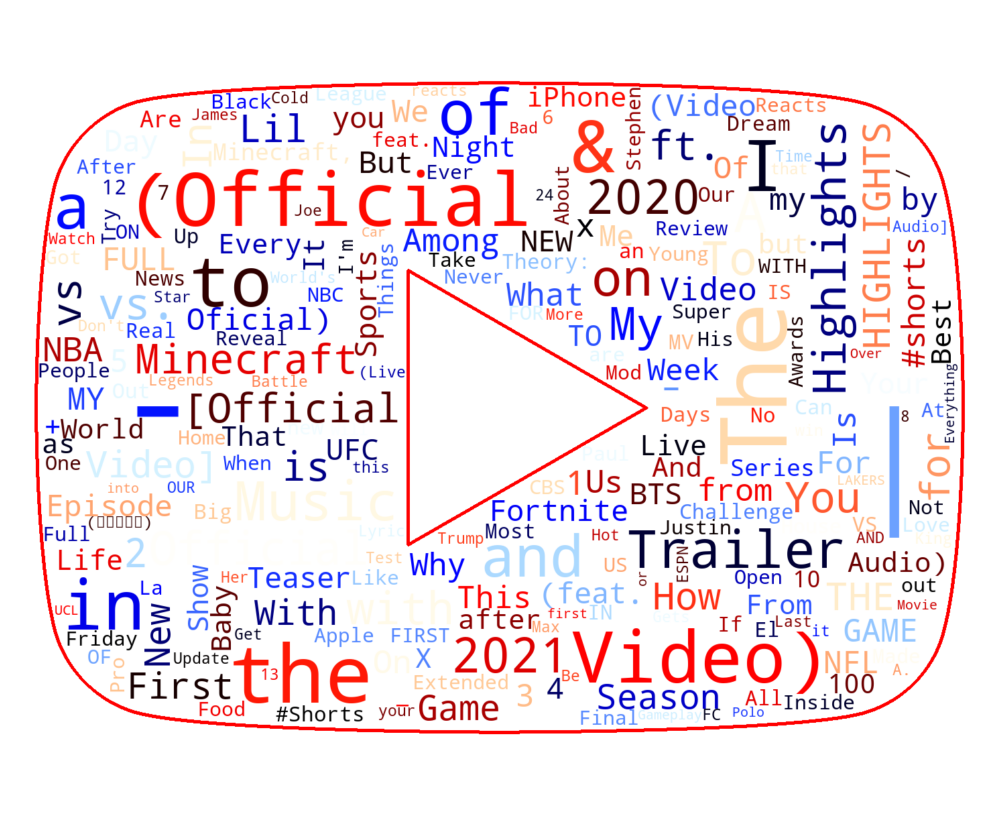

In [150]:
print("Frequency of Specific Words in Titles of Trending YT Videos from the United States of America")
wc_titles = WordCloud(background_color="white", max_words=250, mask=yt_mask4, colormap='flag',
                stopwords=stopwords2,contour_width=5, contour_color='red')

wc_titles.generate_from_frequencies(us_counter_title)

wc_titles.to_file("output/yt_us_logo_title_wc.png")

# show
plt.figure(figsize=[20,15])
plt.imshow(wc_titles, interpolation='bilinear')
plt.axis("off")
plt.show()

Frequency of Specific Words in Titles of Trending YT Videos from India


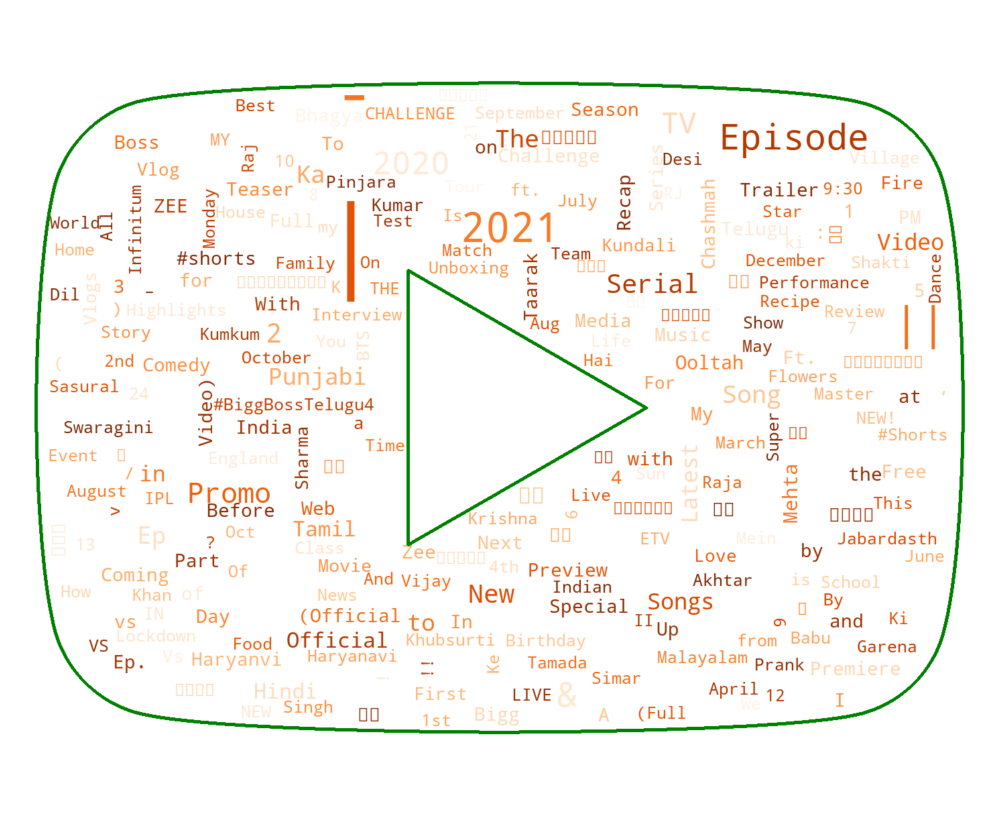

In [151]:
#India
print("Frequency of Specific Words in Titles of Trending YT Videos from India")
wc_in_titles = WordCloud(background_color="white", max_words=250, mask=yt_mask4, colormap='Oranges',
                stopwords=stopwords2,contour_width=5, contour_color='green')

wc_in_titles.generate_from_frequencies(in_counter_title)

wc_in_titles.to_file("output/yt_in_logo_title_wc.png")

# show
plt.figure(figsize=[20,15])
plt.imshow(wc_in_titles, interpolation='bilinear')
plt.axis("off")
plt.show()

Frequency of Specific Words in Titles of Trending YT Videos from Great Britain


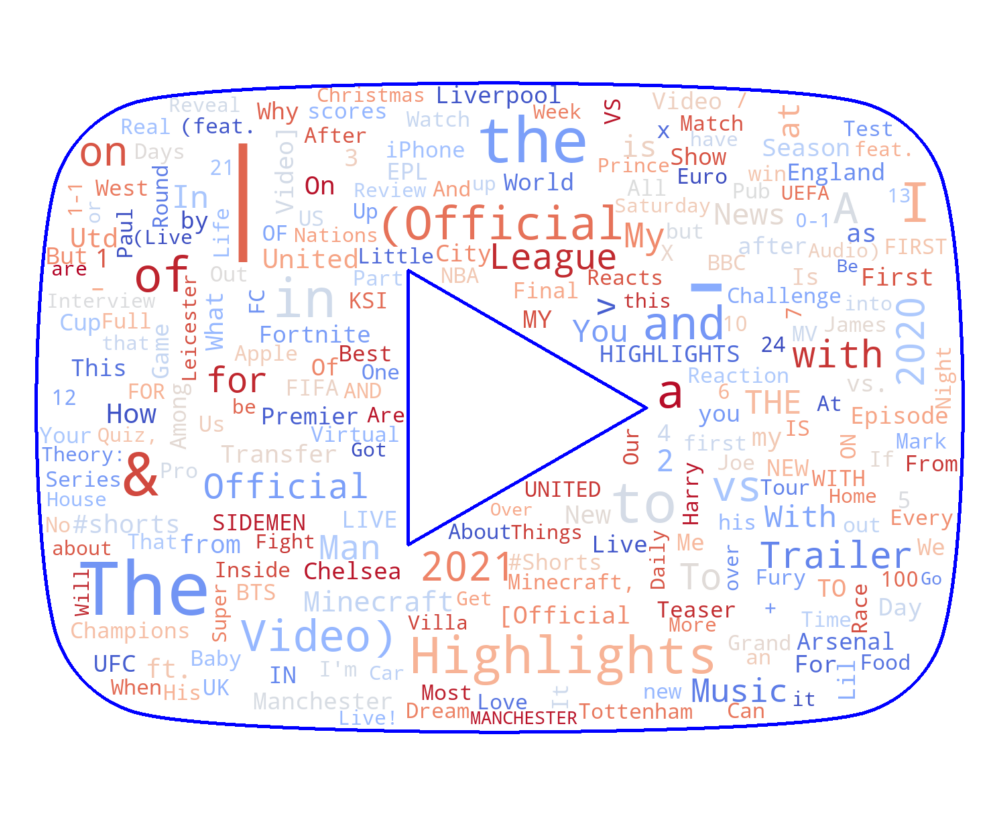

In [152]:
#GB or UK
print("Frequency of Specific Words in Titles of Trending YT Videos from Great Britain")
wc_gb_titles = WordCloud(background_color="white", max_words=250, mask=yt_mask4, colormap='coolwarm',
                stopwords=stopwords2,contour_width=5, contour_color='blue')

wc_gb_titles.generate_from_frequencies(gb_counter_title)

wc_gb_titles.to_file("output/yt_gb_logo_title_wc.png")

# show
plt.figure(figsize=[20,15])
plt.imshow(wc_gb_titles, interpolation='bilinear')
plt.axis("off")
plt.show()



Frequency of Specific Words in Titles of Trending YT Videos from Canada


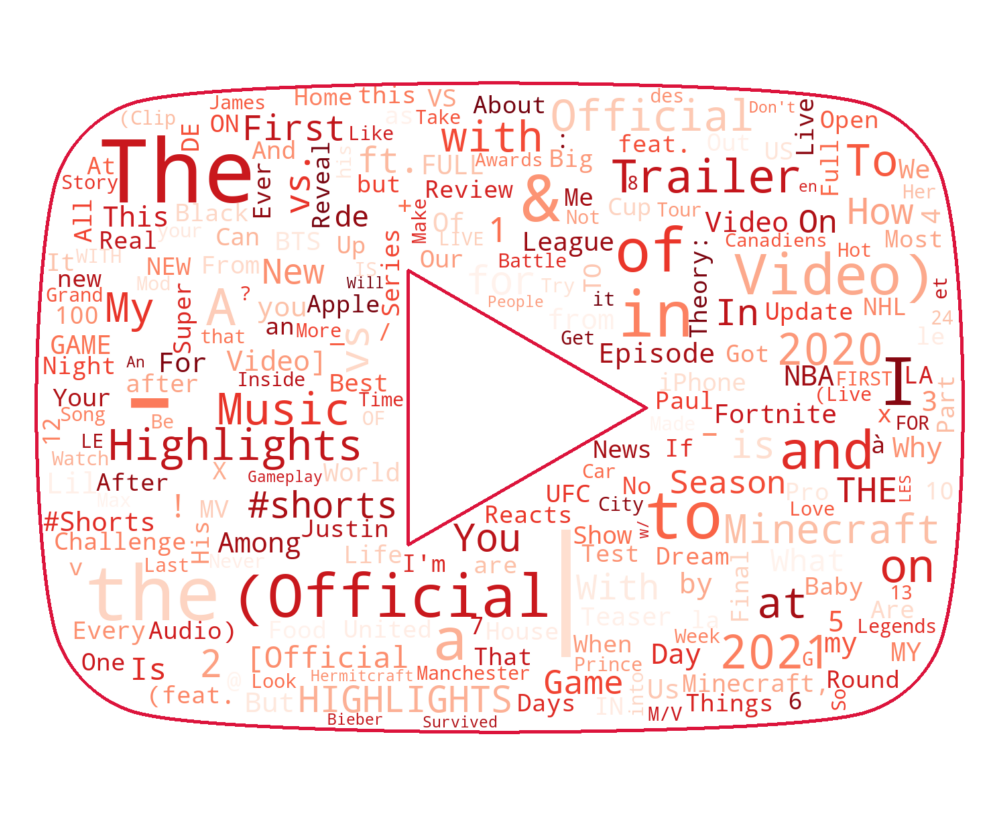

In [153]:
#Canada
print("Frequency of Specific Words in Titles of Trending YT Videos from Canada")
wc_ca_titles = WordCloud(background_color="white", max_words=250, mask=yt_mask4, colormap='Reds',
                stopwords=stopwords2,contour_width=5, contour_color='crimson')

wc_ca_titles.generate_from_frequencies(ca_counter_title)

wc_ca_titles.to_file("output/yt_ca_logo_title_wc.png")

# show
plt.figure(figsize=[20,15])
plt.imshow(wc_ca_titles, interpolation='bilinear')
plt.axis("off")
plt.show()


In [167]:
#india
# tag1

{'[None]': 2264,
 'comedy': 1063,
 'comedy show': 930,
 'hindi shows': 772,
 'bigg boss': 758,
 'colors tv new serial': 650,
 'colors tv promo': 648,
 'crime show': 648,
 'colors tv serials all': 644,
 'कलर्स टीवी': 644,
 'horror show': 643,
 'colors tv khatron ke khiladi': 641,
 'Vijay TV': 626,
 'தமிழ்': 624,
 'தொலைக்காட்சி': 619,
 'Tamil TV': 619,
 'Star Vijay TV': 619,
 'Tamil Shows': 609,
 'colors tv naagin': 606,
 'trending': 594,
 'entertainment': 589,
 'Star': 572,
 'jethalal': 566,
 'funny': 565,
 'reality show': 561,
 'Redefining Entertainment': 513,
 'तारक मेहता': 511,
 'hindi comedy show': 511,
 'tapu sena': 471,
 'sab tv funny show': 467,
 'hotstar': 462,
 'babita': 460,
 'sab tv channel': 437,
 'Vijay': 424,
 'விஜய்': 422,
 'டிவி': 422,
 'vlog': 408,
 'shakti': 384,
 'voot': 363,
 'love': 356,
 'funny video': 348,
 'comedy video': 338,
 'zee5': 338,
 'new': 334,
 'zee tv': 329,
 'sonyliv': 319,
 'new song': 318,
 'fun': 317,
 'sony tv': 315,
 'malayalam': 314,
 'asianet':

In [168]:
#us
# tag2

{'[None]': 2041,
 'funny': 919,
 'comedy': 593,
 'minecraft': 472,
 'challenge': 351,
 'news': 327,
 'vlog': 322,
 'highlights': 304,
 'music': 272,
 '2020': 270,
 'animation': 269,
 'rap': 262,
 'tiktok': 249,
 'gaming': 248,
 'NBA': 244,
 'game': 241,
 'reaction': 238,
 'football': 228,
 'how to': 225,
 'hip hop': 223,
 'video': 209,
 'Football': 208,
 'family': 202,
 'new': 198,
 'fortnite': 198,
 'sports': 196,
 'family friendly': 183,
 'Basketball': 171,
 'Rap': 171,
 'soccer': 163,
 'tik tok': 162,
 'fun': 161,
 'play': 160,
 '2021': 159,
 'review': 158,
 'nba': 154,
 'highlight': 153,
 'G League': 151,
 'NFL': 150,
 'music video': 147,
 'trailer': 147,
 'Highlights': 147,
 'Records': 145,
 'Music': 144,
 'interview': 144,
 'Minecraft': 142,
 'BTS': 135,
 'Hip Hop': 135,
 'espn': 135,
 'sport': 135,
 'gameplay': 134,
 'among us': 132,
 'season': 132,
 'live': 130,
 'dream': 125,
 'minecraft challenge': 124,
 'reacting': 124,
 'science': 123,
 'American Football': 123,
 'basketbal

In [169]:
# tag3

{'[None]': 2227,
 'funny': 866,
 'comedy': 579,
 'minecraft': 539,
 'challenge': 377,
 'vlog': 352,
 'highlights': 331,
 'gaming': 288,
 'news': 288,
 'animation': 262,
 'football': 258,
 'how to': 257,
 'tiktok': 250,
 'fortnite': 248,
 'music': 232,
 'reaction': 221,
 'fun': 220,
 'video': 213,
 'new': 212,
 'NBA': 206,
 '2020': 201,
 'rap': 188,
 'soccer': 187,
 'family': 181,
 'review': 181,
 'family friendly': 180,
 'Football': 177,
 'sports': 173,
 '2021': 172,
 'shorts': 167,
 'diy': 167,
 'Highlights': 167,
 'hip hop': 161,
 'Minecraft': 158,
 'game': 156,
 'interview': 155,
 'Basketball': 154,
 'science': 150,
 'gameplay': 146,
 'tik tok': 145,
 'nba': 145,
 'trailer': 144,
 'dream': 141,
 'BTS': 140,
 'minecraft challenge': 135,
 'live': 135,
 'music video': 131,
 'G League': 131,
 'among us': 130,
 'tutorial': 129,
 'Pop': 128,
 'food': 126,
 'ufc': 124,
 'Funny': 123,
 'prank': 120,
 'fortnite battle royale': 120,
 'humor': 119,
 'Rap': 117,
 'Records': 115,
 'basketball': 

In [170]:
#gb
# tag4

{'[None]': 2241,
 'football': 1043,
 'funny': 825,
 'premier league': 674,
 'Sports': 594,
 'sky sports': 539,
 'comedy': 527,
 'stream': 478,
 'sky sports football': 474,
 'premier league highlights': 467,
 'Sky': 455,
 'minecraft': 439,
 'Sky Sports live': 438,
 'Football League': 437,
 'Football': 385,
 'highlights': 374,
 'Manchester United': 365,
 'challenge': 363,
 'soccer': 360,
 'vlog': 356,
 'Man United': 316,
 'Man Utd': 309,
 'United': 284,
 'MUFC': 279,
 'Solskjaer': 273,
 'The United Stand': 269,
 'United Stand': 268,
 'Manchester United News': 265,
 'news': 264,
 'epl highlights 1920': 261,
 'sidemen': 260,
 'Man Utd News': 256,
 'Manchester United Transfer News': 254,
 'Transfer': 253,
 'Manchester United TV': 244,
 'Solskjaer news': 244,
 'gaming': 239,
 'music': 229,
 'tiktok': 225,
 'Ole Gunnar Solskjaer': 225,
 '2020': 217,
 'live': 215,
 'boxing': 214,
 'Premier League': 206,
 '2021': 202,
 'fortnite': 199,
 'interview': 195,
 'reaction': 194,
 'fun': 193,
 'how to'

In [131]:
#https://stackoverflow.com/questions/38987/how-do-i-merge-two-dictionaries-in-a-single-expression-taking-union-of-dictiona
#https://towardsdatascience.com/merge-dictionaries-in-python-d4e9ce137374

#combining all titles in countries into one list
tit1 = in_counter_title.copy()
tit2 = us_counter_title.copy()
tit3 = gb_counter_title.copy()
tit4 = ca_counter_title.copy()

tit_all_countries={**tit1,**tit2,**tit3,**tit4}


#combining all tags in countries into list 
tag1 = in_counter_tags.copy()
tag2 = us_counter_tags.copy()
tag3 = ca_counter_tags.copy()
tag4 = gb_counter_tags.copy()
# this doesnt do what was intended. 
tag_all_countries = {**tag1,**tag2,**tag3,**tag4}



In [145]:
# tag1a=Counter(tag1)
#this does though

#setting up dicts for sum total of all countries
t1a = Counter(us_tag_words)
t2a = Counter(gb_tag_words)
t3a= Counter(ca_tag_words)
t4a= Counter(in_tag_words)
tag_add_all=t1a+t2a+t3a+t4a
tag_add_all = dict(tag_add_all.most_common(300))



tit1a = Counter(us_title_words)
tit2a = Counter(in_title_words)
tit3a = Counter(ca_title_words)
tit4a = Counter(gb_title_words)
tit_add_all=tit1a+tit2a+tit3a+tit4a
tit_add_all=dict(tit_add_all.most_common(300))
tag_add_all

{'[None]': 8773,
 'funny': 3175,
 'comedy': 2762,
 'football': 1582,
 'minecraft': 1515,
 'vlog': 1438,
 'challenge': 1259,
 'highlights': 1109,
 'news': 1010,
 '2020': 942,
 'comedy show': 930,
 'new': 928,
 'entertainment': 906,
 'fun': 891,
 'music': 878,
 '2021': 819,
 'gaming': 816,
 'family': 809,
 'tiktok': 805,
 'premier league': 804,
 'trending': 801,
 'Sports': 796,
 'Football': 775,
 'hindi shows': 772,
 'how to': 766,
 'bigg boss': 758,
 'soccer': 750,
 'video': 748,
 'animation': 735,
 'reaction': 693,
 'crime show': 659,
 'fortnite': 650,
 'colors tv new serial': 650,
 'colors tv promo': 648,
 'rap': 646,
 'colors tv serials all': 644,
 'कलर्स टीवी': 644,
 'review': 643,
 'horror show': 643,
 'colors tv khatron ke khiladi': 641,
 'Vijay TV': 626,
 'தமிழ்': 624,
 'தொலைக்காட்சி': 619,
 'Tamil TV': 619,
 'Star Vijay TV': 619,
 'Tamil Shows': 609,
 'colors tv naagin': 606,
 'shorts': 601,
 'stream': 594,
 'Star': 585,
 'sports': 583,
 'sky sports': 583,
 'reality show': 570,


In [146]:
tit_add_all

{'|': 48580,
 '-': 18426,
 'The': 6806,
 '&': 5274,
 'the': 4624,
 '2021': 4328,
 'to': 4053,
 'in': 3783,
 'I': 3763,
 '||': 3246,
 '(Official': 3244,
 '2020': 3059,
 'Video)': 3044,
 'of': 2932,
 'a': 2717,
 'and': 2613,
 '': 2602,
 'Episode': 2515,
 'A': 2346,
 '2': 2167,
 'on': 2130,
 'Official': 1998,
 'Trailer': 1978,
 'Highlights': 1978,
 'vs': 1938,
 'Music': 1809,
 'New': 1806,
 'My': 1778,
 'To': 1763,
 'with': 1755,
 'at': 1494,
 'for': 1473,
 'TV': 1435,
 'In': 1388,
 'Video': 1351,
 '1': 1304,
 'Promo': 1235,
 'With': 1231,
 'Season': 1196,
 'is': 1195,
 'Song': 1141,
 'You': 1132,
 'THE': 1101,
 'ft.': 1094,
 '#shorts': 1070,
 'Serial': 1065,
 'Ep': 1055,
 'How': 1030,
 'Minecraft': 1026,
 '3': 1015,
 'First': 1011,
 'Ka': 1001,
 'by': 971,
 '5': 970,
 'Day': 969,
 'Punjabi': 929,
 'Teaser': 889,
 '4': 880,
 'On': 875,
 'vs.': 868,
 'Songs': 865,
 '–': 863,
 'Latest': 851,
 'का': 823,
 'For': 807,
 'HIGHLIGHTS': 787,
 'Of': 747,
 'my': 741,
 '[Official': 734,
 'Series': 7

Frequency of Specific Words in Tags of Trending YT Videos from Around the World


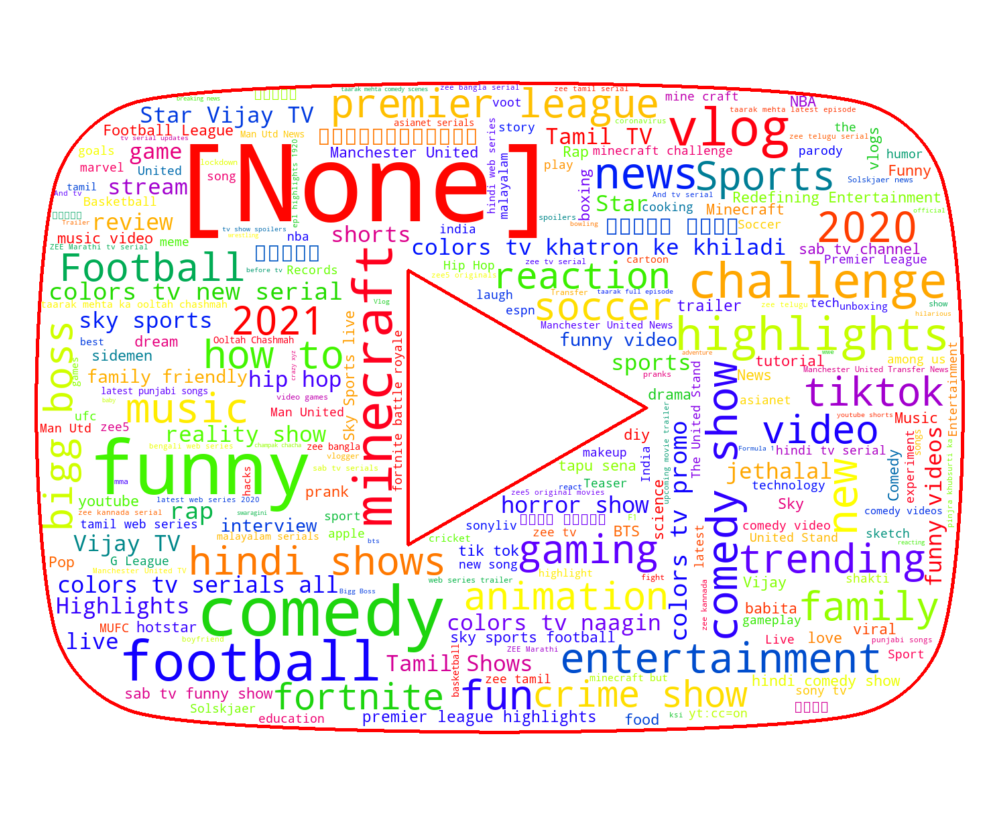

In [147]:
#https://matplotlib.org/stable/tutorials/colors/colormaps.html
#Tags all countries wordcloud

print("Frequency of Specific Words in Tags of Trending YT Videos from Around the World")
wc_tags_all = WordCloud(background_color="white", max_words=250, mask=yt_mask4, colormap='prism',
                contour_width=5, contour_color='red')

wc_tags_all.generate_from_frequencies(tag_add_all)

wc_tags_all.to_file("output/yt_all_countries_logo_tags_wc.png")

# show
plt.figure(figsize=[20,15])
plt.imshow(wc_tags_all, interpolation='bilinear')
plt.axis("off")
plt.show()


Frequency of Specific Words in Titles of Trending YT Videos from Around the World


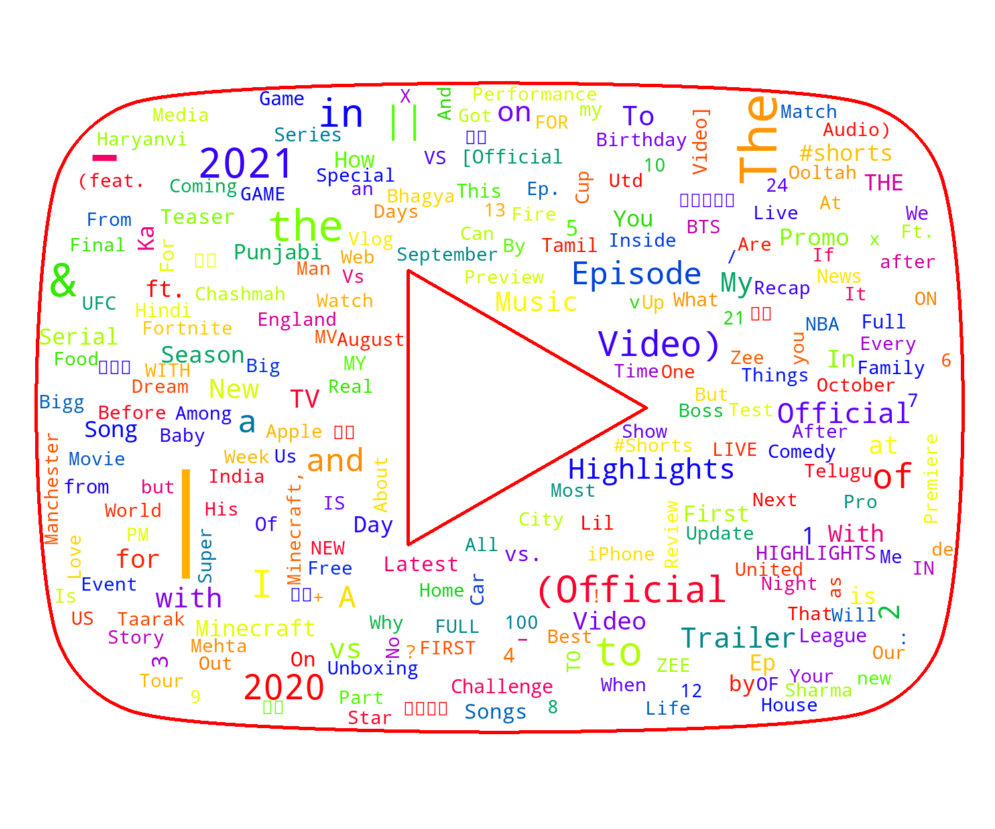

In [148]:
#stopwords will not work for some reason, I have tried surrounding them in [], (), and {}. None will recognize the stopwords param.

print("Frequency of Specific Words in Titles of Trending YT Videos from Around the World")
wc_all_titles = WordCloud(background_color="white", max_words=250, mask=yt_mask4, colormap='prism',
                stopwords=stopwords2,contour_width=5, contour_color='red')

wc_all_titles.generate_from_frequencies(tit_add_all)

wc_all_titles.to_file("output/yt_all_countries_logo_title_wc.png")

# show
plt.figure(figsize=[20,15])
plt.imshow(wc_all_titles, interpolation='bilinear')
plt.axis("off")
plt.show()


The r-squarted is: 0.8


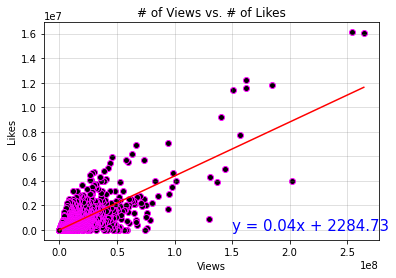

In [158]:
#scatter plots, not used in presentation, but still ended up in final version of code.
x=ttv_in['view_count']
y=ttv_in['likes']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
reg1 = x*slope+intercept

# linear regression line and correlation coefficient
line1 =  "y = " + str(round(slope,2))+ "x + "+str(round(intercept,2))
corrcoef = st.pearsonr(x,y)
r1 = corrcoef[0].round(2)

#print r
print(f"The r-squarted is: {r1}")




plt.scatter(x,y,edgecolors="magenta",facecolors="black")
plt.plot(x,reg1,'r-')
plt.annotate(line1,(150000000,0),fontsize=15,color="blue")

plt.grid(b=True,alpha=0.3,linestyle="-",color="grey")
plt.title(f"# of Views vs. # of Likes")
plt.xlabel('Views')
plt.ylabel('Likes')
plt.savefig('output/views_vs_likes_in.png')
plt.show()

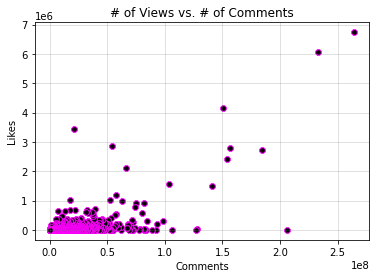

In [70]:
# x=df1_cleaned['view_count']
# y=df1_cleaned['comment_count']
# plt.scatter(x,y,marker="8",edgecolors="magenta",facecolors="black")
# plt.grid(b=True,alpha=0.3,linestyle="-",color="grey")
# plt.title(f"# of Views vs. # of Comments")
# plt.xlabel('Comments')
# plt.ylabel('Likes')

# plt.show()

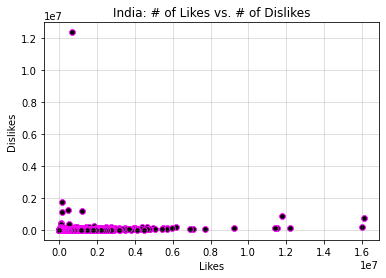

In [161]:
x=ttv_in['likes']
y=ttv_in['dislikes']
plt.scatter(x,y,marker="8",edgecolors="magenta",facecolors="black")
plt.grid(b=True,alpha=0.3,linestyle="-",color="grey")
plt.title(f"India: # of Likes vs. # of Dislikes")
plt.xlabel('Likes')
plt.ylabel('Dislikes')

plt.show()

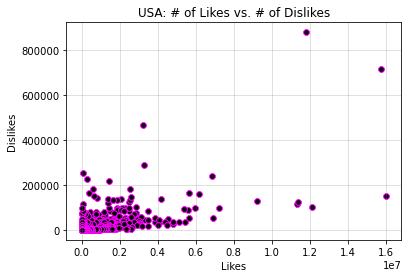

In [162]:
x=ttv_us['likes']
y=ttv_us['dislikes']
plt.scatter(x,y,marker="8",edgecolors="magenta",facecolors="black")
plt.grid(b=True,alpha=0.3,linestyle="-",color="grey")
plt.title(f"USA: # of Likes vs. # of Dislikes")
plt.xlabel('Likes')
plt.ylabel('Dislikes')

plt.show()

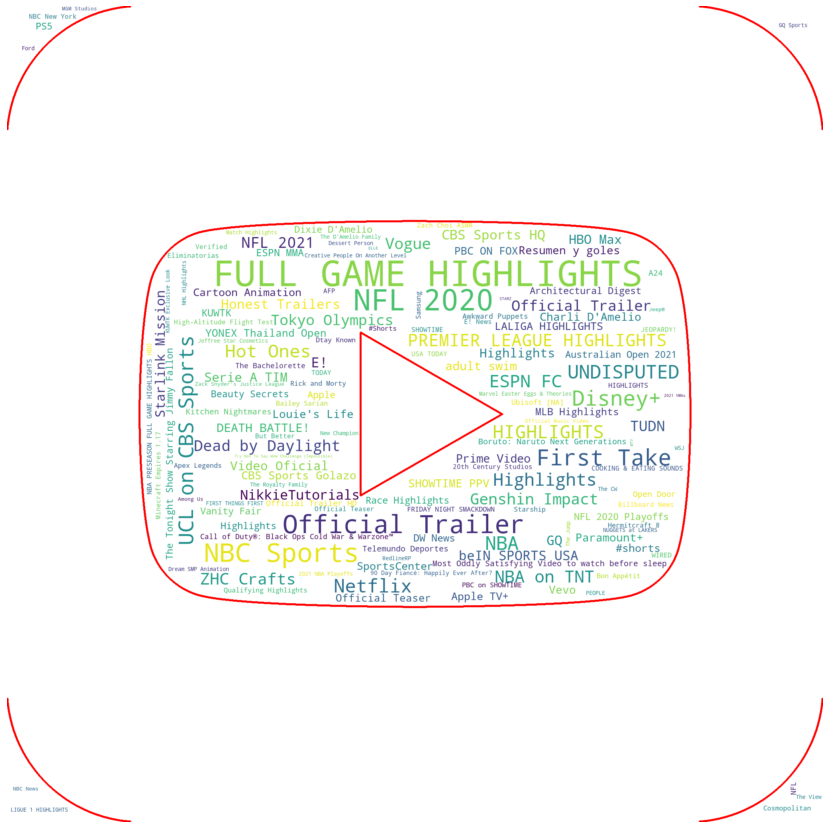

In [119]:


stopwords2=['|','-','The','the','&','I','.',',','to','in','a','A','of','on','and','To','is','1','2','3','4','5','6','7','8','9','+']

In [88]:
# title_words2 = list(df1_cleaned["title"].apply(lambda x: x.split(' ')))
# title_words2 = [x for y in title_words2 for x in y]
# counter_title2 = dict(Counter(title_words2).most_common(200))
# counter_title2


{'|': 4296,
 '-': 4047,
 'The': 1831,
 'the': 1347,
 '(Official': 1128,
 '&': 1058,
 'I': 1038,
 'Video)': 1014,
 'to': 997,
 'in': 982,
 'a': 787,
 'of': 785,
 'and': 651,
 'A': 613,
 'Music': 589,
 'Trailer': 551,
 'on': 535,
 '2021': 490,
 '2020': 461,
 'To': 449,
 'Official': 436,
 'at': 428,
 'Highlights': 423,
 'My': 422,
 'with': 409,
 'vs.': 375,
 'You': 355,
 'vs': 337,
 'Minecraft': 335,
 'for': 327,
 'is': 324,
 '2': 322,
 'In': 321,
 'ft.': 317,
 '[Official': 316,
 'THE': 294,
 'Lil': 282,
 'How': 271,
 'HIGHLIGHTS': 266,
 'Video]': 261,
 'First': 257,
 'New': 252,
 'Game': 245,
 '#shorts': 241,
 'With': 241,
 '1': 234,
 'Season': 233,
 '–': 221,
 'NBA': 217,
 'x': 209,
 '': 207,
 'On': 198,
 'Among': 197,
 'Is': 194,
 'Video': 193,
 'What': 193,
 'FULL': 184,
 'Us': 183,
 'GAME': 183,
 'from': 181,
 '5': 180,
 '3': 180,
 'my': 175,
 'We': 172,
 'This': 171,
 'MY': 171,
 'by': 169,
 'Why': 169,
 'NFL': 168,
 'For': 167,
 'Episode': 160,
 'Of': 159,
 'But': 157,
 'Week': 157

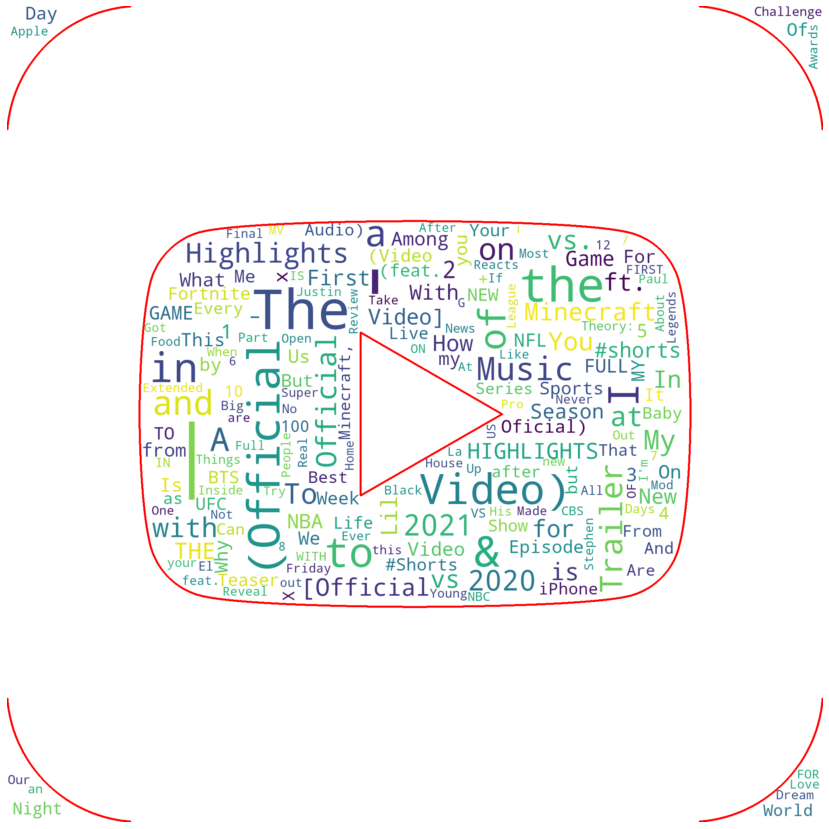

In [122]:
# wc3 = WordCloud(background_color="white", max_words=250, mask=yt_mask3,
#                stopwords=stopwords2, contour_width=5, contour_color='red')

# wc3.generate_from_frequencies(counter_title2)

# wc3.to_file("output/yt_logo_title2nd_wc.png")

# # show
# plt.figure(figsize=[20,15])
# plt.imshow(wc3, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [171]:
# desc_words = list(df1_cleaned["description"].apply(lambda x: x.split(' ')))
# desc_words = [x for y in desc_words for x in y]
# counter_desc = dict(Counter(title_desc).most_common(200))
# counter_desc